In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=cb46fdd39e815fbc6b425a4636c88e9ebc725242b8ec929af724f152f58806e2
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


SparkSession: Se pueden crear dataframes, leer fuentes de datos y acceder a tods las funcionalidades de spark

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName('Curso PySpark').getOrCreate() ## si esta en un cluster se pone el nombre de yarn o mesos, si es en local se pone local[numero de nodos]


In [ ]:
spark

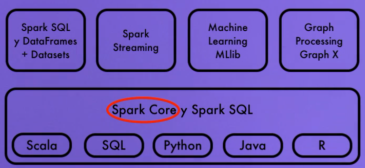

RDD: Colección de elementos particionados a lo largo del cluster.

- Depedencias: Se puede replicar un RDD con estas dependencias y hacer operaciones sobre el.(Resiliencia)

- Particiones: Paralelizar operaciones

- Función de Cálculo: Produce un iterador para los datos que se almacenan en el RDD.

In [ ]:
sc = spark.sparkContext

In [ ]:
# Crear un RDD vacío

rdd_vacio=sc.emptyRDD

In [ ]:
#Crear rdd con parallelize

rdd_vacio3=sc.parallelize([],3)
rdd_vacio3.getNumPartitions()

3

In [ ]:
rdd = sc.parallelize([1,2,3,4,5])
rdd.collect()

[1, 2, 3, 4, 5]

In [ ]:
#Crear rdd desde un archivo de texto

rdd_texto=sc.textFile('rdd_source.txt')
rdd_texto.collect()

['Así podemos crear', 'un RDD desde un', 'archivo de texto!!!']

In [ ]:
rdd_texto_completo=sc.wholeTextFiles('rdd_source.txt')
rdd_texto_completo.collect()

[('file:/content/rdd_source.txt',
  'Así podemos crear\nun RDD desde un\narchivo de texto!!!')]

In [ ]:
#RDD a partir de otro RDD
rdd_suma=rdd.map(lambda x:x+1)
rdd_suma.collect()

[2, 3, 4, 5, 6]

In [ ]:
#RDD con dataframe

df=spark.createDataFrame([(1,'Jose'),(2,'Juan')],['id','Nombre'])
df.show()

+---+------+
| id|Nombre|
+---+------+
|  1|  Jose|
|  2|  Juan|
+---+------+



In [ ]:
rdd_df=df.rdd
rdd_df.collect()

[Row(id=1, Nombre='Jose'), Row(id=2, Nombre='Juan')]

In [ ]:
def primos(n):
  flag=True
  for i in range(2,n):
    if n%i==0:
      flag=False
  if flag==True:
    return n

In [ ]:
#RDD a partir de otro RDD
rdd=sc.parallelize(list(range(1,21)))
rdd_filtrado=sc.parallelize(list(filter(lambda x: x!= None, rdd.map(primos).collect())))
rdd_filtrado.collect()

[1, 2, 3, 5, 7, 11, 13, 17, 19]

In [ ]:
rdd_filtrado.filter(lambda x:x>10).collect()

[11, 13, 17, 19]

Transformaciones en un RDD:
Los RDD son inmutables y cada operación crea un nuevo RDD. Las dos operaciones principales son:

- Transformaciones: Cambian los elementos en el RDD. (Evaluación perezosa, solo cuando el controlador piede los datos.)

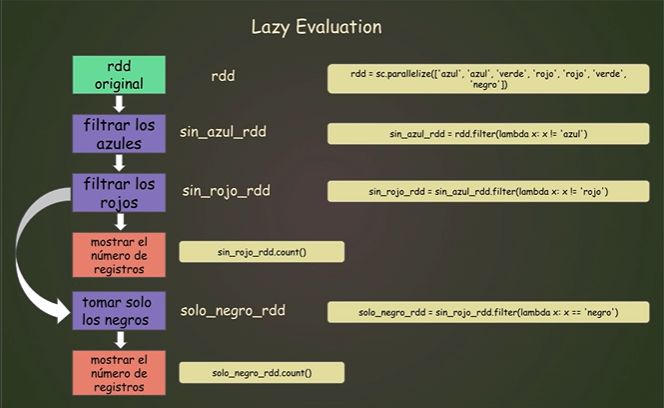
- Acciones

# Función Map

In [ ]:
rdd = sc.parallelize([1,2,3,4,5])

In [ ]:
rdd_resta = rdd.map(lambda x:x-1)
rdd_resta.collect()

[0, 1, 2, 3, 4]

In [ ]:
rdd_par = rdd.map(lambda x:x%2==0)
rdd_par.collect()

[False, True, False, True, False]

In [ ]:
rdd_texto=sc.parallelize(['jose','juan','lucia'])

In [ ]:
rdd_mayuscula = rdd_texto.map(lambda x: x.upper())
rdd_mayuscula.collect()

['JOSE', 'JUAN', 'LUCIA']

In [ ]:
rdd_hola = rdd_texto.map(lambda x: 'Hola ' + x )
rdd_hola.collect()

['Hola jose', 'Hola juan', 'Hola lucia']

# flatMap

In [ ]:
rdd = sc.parallelize([1,2,3,4,5])

In [ ]:
rdd_cuadrado=rdd.map(lambda x:(x,x**2))
rdd_cuadrado.collect()

[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]

In [ ]:
rdd_cuadrado_flat=rdd.flatMap(lambda x:(x,x**2))
rdd_cuadrado_flat.collect()

[1, 1, 2, 4, 3, 9, 4, 16, 5, 25]

In [ ]:
rdd_texto=sc.parallelize(['jose','juan','lucia'])
rdd_texto_flat=rdd_texto.flatMap(lambda x:(x,x.upper()))
rdd_texto_flat.collect()

['jose', 'JOSE', 'juan', 'JUAN', 'lucia', 'LUCIA']

# Filter

In [ ]:
rdd = sc.parallelize([1,2,3,4,5,6,7,8,9])

In [ ]:
rdd_filtrado=rdd.filter(lambda x:x%2==0)
rdd_filtrado.collect()

[2, 4, 6, 8]

In [ ]:
rdd_impar=rdd.filter(lambda x:x%2!=0)
rdd_impar.collect()

[1, 3, 5, 7, 9]

In [ ]:
rdd_texto=sc.parallelize(['jose','juan','joaquin','lucia','karla','katia'])

In [ ]:
rdd_k=rdd_texto.filter(lambda x: x.startswith('k'))
rdd_k.collect()

['karla', 'katia']

In [ ]:
rdd_filtro=rdd_texto.filter(lambda x: x.startswith('j') and x.find('u')==1)
rdd_filtro.collect()

['juan']

# Coalesce

In [ ]:
rdd = sc.parallelize([1,2,3,4,5],10)

In [ ]:
rdd.getNumPartitions()

10

In [ ]:
rdd5=rdd.coalesce(5)
rdd.collect()

[1, 2, 3, 4, 5]

In [ ]:
rdd5.getNumPartitions()

5

# Repartition

In [ ]:
rdd=sc.parallelize([1,2,3,4,5],3)

In [ ]:
rdd.getNumPartitions()

3

In [ ]:
rdd7=rdd.repartition(7)

In [ ]:
rdd7.getNumPartitions()

7

# ReduceByKey

In [ ]:
rdd=sc.parallelize([('casa',2),('parque',1),('que',5),('casa',1),('escuela',2),('casa',1),('que',1)])

In [ ]:
rdd.collect()

[('casa', 2),
 ('parque', 1),
 ('que', 5),
 ('casa', 1),
 ('escuela', 2),
 ('casa', 1),
 ('que', 1)]

In [ ]:
rdd_reducido = rdd.reduceByKey(lambda x,y: x+y)
rdd_reducido.collect()

[('parque', 1), ('que', 6), ('casa', 4), ('escuela', 2)]

# Acciones en RDD

- Driver: Recopilan la información y realizan calculos en el ejecutor remoto.

- Distributed: Ocurren en el nodo.

# Función Reduce

In [ ]:
rdd=sc.parallelize([2,4,6,8])

In [ ]:
rdd.reduce(lambda x,y: x+y)

20

In [ ]:
rdd1=sc.parallelize([1,2,3,4])

In [ ]:
rdd1.reduce(lambda x,y:x*y)

24

# Función Count

In [ ]:
rdd=sc.parallelize(['j','o','s','e'])

In [ ]:
rdd.count()

4

In [ ]:
rdd1=sc.parallelize([item for item in range(10)])

In [ ]:
rdd1.count()

10

# Collect


In [ ]:
rdd = sc.parallelize('Hola Apache Spark'.split(' '))

In [ ]:
rdd.collect()

['Hola', 'Apache', 'Spark']

In [ ]:
rdd1 = sc.parallelize([(item, item**2) for item in range(20)])

In [ ]:
rdd1.collect()

[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81),
 (10, 100),
 (11, 121),
 (12, 144),
 (13, 169),
 (14, 196),
 (15, 225),
 (16, 256),
 (17, 289),
 (18, 324),
 (19, 361)]

# Funciones Take, Max y saveAsTextFile

In [ ]:
rdd = sc.parallelize('La programación es bella'.split(' '))

In [ ]:
rdd.top(1)

['programación']

In [ ]:
rdd.take(2)

['La', 'programación']

In [ ]:
rdd.take(4)

['La', 'programación', 'es', 'bella']

In [ ]:
rdd1 = sc.parallelize([item/(item+1) for item in range(10)])

In [ ]:
rdd1.max()

0.9

In [ ]:
rdd.coalesce(1).saveAsTextFile('./rdd1')

# Ejemplo


In [ ]:
def factorial(n):
  if n==0:
    return 1
  else:
    rdd = sc.parallelize(list(range(1,n+1)))
    return rdd.reduce(lambda x,y:x*y)

In [ ]:
factorial(3)

6

In [ ]:
factorial(6)

720

# Almacenamiento en caché

- Los RDD se guardan lo que más se pueda en memoria.

- Si el RDD es más grande que la memoria entonces se utiliza disco, es menos óptimo.

- Podemos marcar un RDD como almacenado en caché usando persist() o cache()

- cache() es simplemente un sinónimo de persist(MEMORY_ONLY)

- persist() puede usar memoria o disco o ambas.

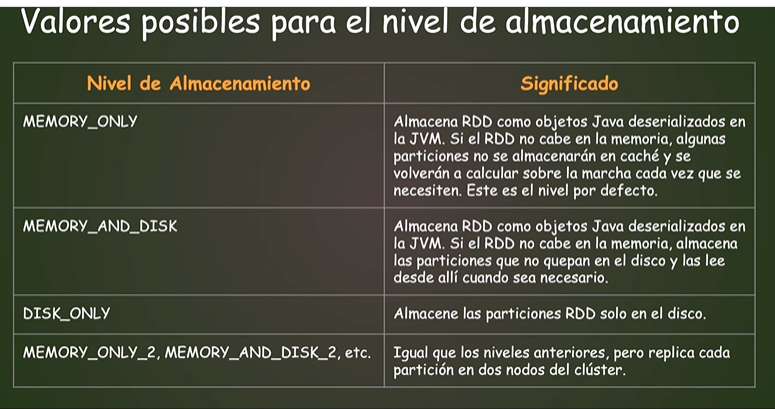

In [ ]:
rdd=sc.parallelize([item for item in range(10)])

In [ ]:
from pyspark.storagelevel import StorageLevel

In [ ]:
rdd.persist(StorageLevel.MEMORY_ONLY)

ParallelCollectionRDD[6] at readRDDFromFile at PythonRDD.scala:287

In [ ]:
rdd.unpersist()

ParallelCollectionRDD[6] at readRDDFromFile at PythonRDD.scala:287

In [ ]:
rdd.persist(StorageLevel.DISK_ONLY)

ParallelCollectionRDD[6] at readRDDFromFile at PythonRDD.scala:287

In [ ]:
rdd.unpersist()

ParallelCollectionRDD[6] at readRDDFromFile at PythonRDD.scala:287

In [ ]:
rdd.cache()

ParallelCollectionRDD[6] at readRDDFromFile at PythonRDD.scala:287

# Particionando y mezcla de datos (shuffling)

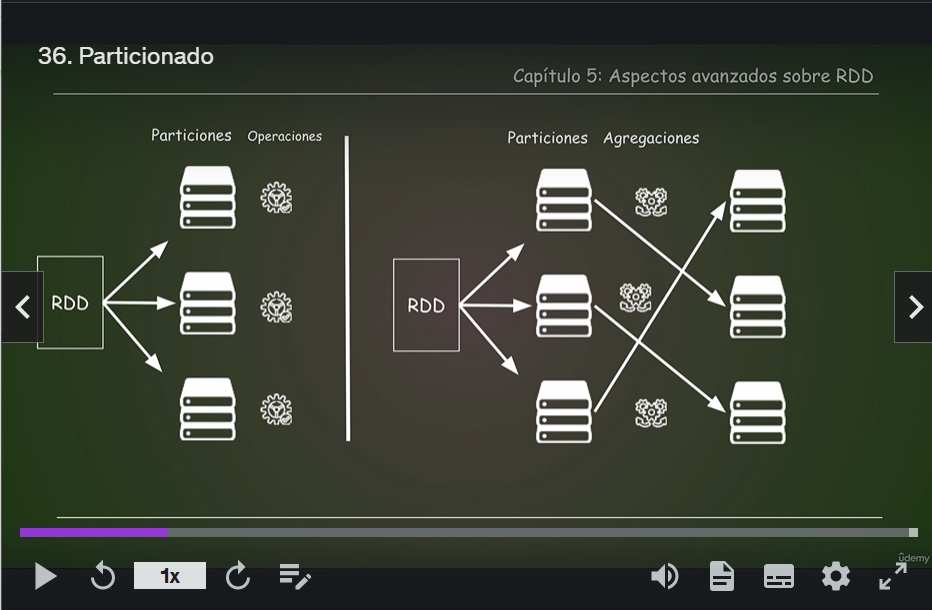

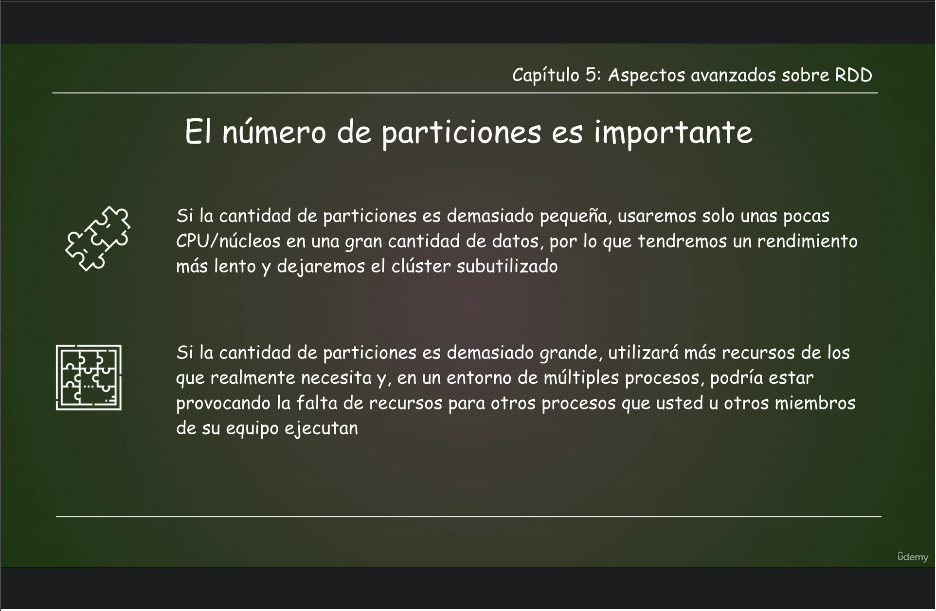

# Particionadores

- HashPartitioner: Particionador predeterminado en Spark

partitionIndex = hash(item)%numPartitions

- RangePartitioner: Funciona dividiendo en RDD en rangos aprox iguales
  - Primero necesita límites razonables para particiones basados en RDD.
  - Luego crea una función desde la clave K hasta el partitionKey al que pertenece el elemento
  - Reparticiona el RDD, basado en el RangePartitioner para distribuir los elementos del RDD correctamente según los rangos que determinamos.


In [ ]:
rdd = sc.parallelize(['x','y','z'])

In [ ]:
num_particiones=6

In [ ]:
#indice_particion = hash(item)%num_particiones

In [ ]:
hash('x') % num_particiones

5

In [ ]:
hash('y') % num_particiones

4

In [ ]:
hash('z') % num_particiones

1

# Mezcla de datos

- Resultan de agregaciones

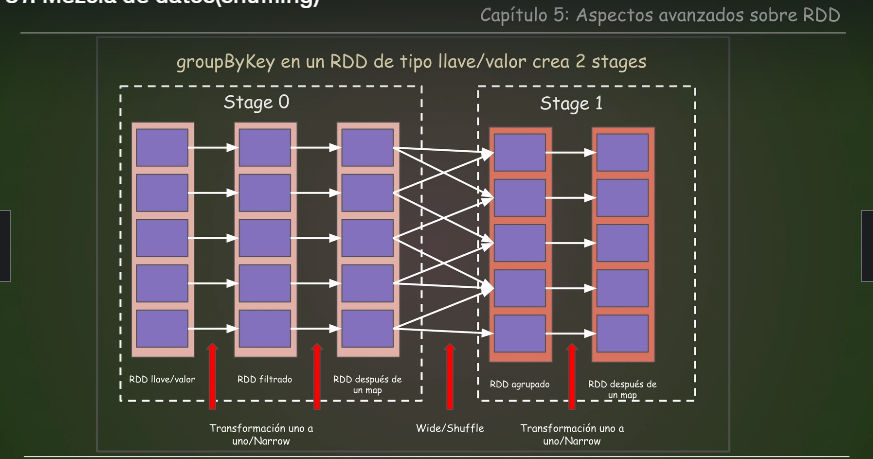

# Broadcast Variables

In [ ]:
rdd = sc.parallelize([item for item in range(10)])

In [ ]:
uno = 1

In [ ]:
br_uno = sc.broadcast(uno) # puedo acceder desde cualquier nodo. Del driver se divide a todos los nodos. Ocupa espacio en memoria.

In [ ]:
rdd1 = rdd.map(lambda x:x+br_uno.value)

In [ ]:
rdd1.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
br_uno.unpersist()

In [ ]:
rdd1 = rdd.map(lambda x:x+br_uno.value)

In [ ]:
rdd1.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
br_uno.destroy()

In [ ]:
rdd1 = rdd.map(lambda x:x+br_uno.value)

# Acumuladores

In [ ]:
acumulador = sc.accumulator(0)

In [ ]:
rdd = sc.parallelize([2,4,6,8,10])

In [ ]:
rdd.foreach(lambda x: acumulador.add(x))

In [ ]:
print(acumulador.value)

30


In [ ]:
rdd1= sc.parallelize('Mi nombre es Jose Miguel y me siento genial.'.split(' '))

In [ ]:
acumulador=sc.accumulator(0)

In [ ]:
rdd1.foreach(lambda x: acumulador.add(1))

In [ ]:
print(acumulador.value)

9


In [ ]:
#Ejercicios

importes = sc.textFile('rdd.txt')
importes.collect()

['527',
 '386',
 '701',
 '240',
 '941',
 '27',
 '396',
 '56',
 '456',
 '148',
 '160',
 '229',
 '438',
 '829',
 '130',
 '386',
 '913',
 '869',
 '700',
 '93',
 '334',
 '329',
 '776',
 '882',
 '590',
 '991',
 '119',
 '721',
 '88',
 '59',
 '723',
 '118',
 '746',
 '698',
 '507',
 '585',
 '722',
 '372',
 '59',
 '969',
 '909',
 '355',
 '73',
 '601',
 '324',
 '656',
 '546',
 '318',
 '836',
 '755',
 '133',
 '373',
 '123',
 '479',
 '284',
 '801',
 '824',
 '412',
 '388',
 '609',
 '129',
 '914',
 '918',
 '510',
 '490',
 '995',
 '779',
 '813',
 '238',
 '145',
 '644',
 '506',
 '566',
 '41',
 '758',
 '828',
 '129',
 '852',
 '775',
 '283',
 '452',
 '241',
 '203',
 '753',
 '847',
 '817',
 '137',
 '163',
 '466',
 '498',
 '114',
 '31',
 '49',
 '644',
 '152',
 '36',
 '866',
 '262',
 '662',
 '811',
 '325',
 '545',
 '995',
 '634',
 '551',
 '27',
 '610',
 '464',
 '586',
 '255',
 '516',
 '12',
 '481',
 '209',
 '732',
 '913',
 '715',
 '228',
 '755',
 '293',
 '441',
 '732',
 '343',
 '995',
 '71',
 '316',
 '973'

In [ ]:
total_ventas = sc.accumulator(0)
importe_total=sc.accumulator(0)

In [ ]:

importes.foreach(lambda x: total_ventas.add(1))
importes.foreach(lambda x: importe_total.add(int(x)))

In [ ]:
print(total_ventas.value)
print(importe_total.value)

20000
5042335


In [ ]:
impuesto = sc.broadcast(10)

In [ ]:
ventas_sin_impuesto=importes.map(lambda x:int(x)-impuesto.value)

In [ ]:
ventas_sin_impuesto.take(5)

[517, 376, 691, 230, 931]

In [ ]:
impuesto.destroy()

In [ ]:
from pyspark.storagelevel import StorageLevel

In [ ]:
ventas_sin_impuesto.cache()

PythonRDD[14] at collect at <ipython-input-29-967a5d3c7af9>:1

In [ ]:
ventas_sin_impuesto.unpersist()

PythonRDD[14] at collect at <ipython-input-29-967a5d3c7af9>:1

In [ ]:
ventas_sin_impuesto.persist(StorageLevel.DISK_ONLY)

PythonRDD[14] at collect at <ipython-input-29-967a5d3c7af9>:1

In [ ]:
ventas_sin_impuesto.unpersist()

PythonRDD[14] at collect at <ipython-input-29-967a5d3c7af9>:1

In [ ]:
ventas_sin_impuesto.persist(StorageLevel.MEMORY_AND_DISK)

PythonRDD[14] at collect at <ipython-input-29-967a5d3c7af9>:1

# Spark SQL

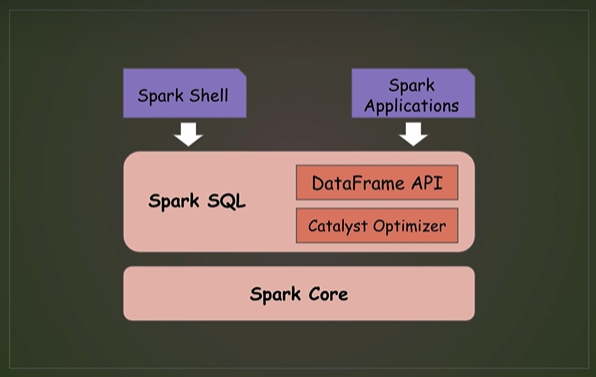

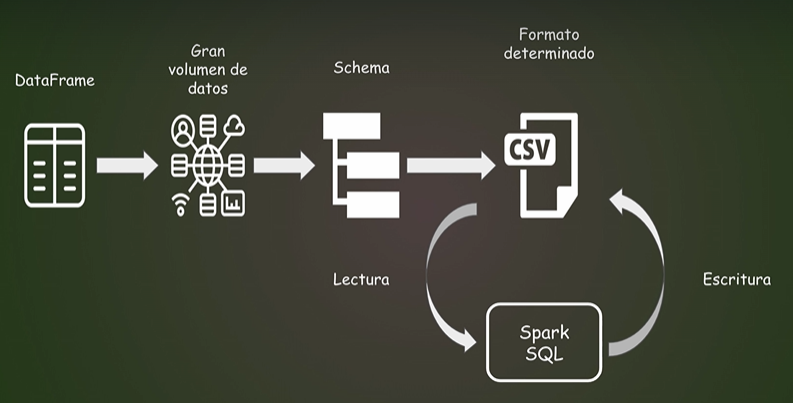

In [ ]:
rdd = sc.parallelize([item for item in range(10)]).map(lambda x: (x,x**2))

In [ ]:
rdd.collect()

[(0, 0),
 (1, 1),
 (2, 4),
 (3, 9),
 (4, 16),
 (5, 25),
 (6, 36),
 (7, 49),
 (8, 64),
 (9, 81)]

In [ ]:
df = rdd.toDF(['numero','cuadrado'])

In [ ]:
df.printSchema()

root
 |-- numero: long (nullable = true)
 |-- cuadrado: long (nullable = true)



In [ ]:
df.show(5)

+------+--------+
|numero|cuadrado|
+------+--------+
|     0|       0|
|     1|       1|
|     2|       4|
|     3|       9|
|     4|      16|
+------+--------+
only showing top 5 rows



Crear un dataframe a partir de un rdd con schema

In [ ]:
rdd1=sc.parallelize([(1,'Jose',35.5),(2,'Teresa',54.3),(3,'Katia',12.7)])

In [ ]:
from pyspark.sql.types import *

In [ ]:
#Via uno

esquema1 = StructType(
    [
        StructField('id',IntegerType(),True),
        StructField('Nombre',StringType(), True),
        StructField('Saldo', DoubleType(),True)
    ]
)

In [ ]:
#Via dos

esquema2 = "`id` INT, `nombre` STRING, `saldo` DOUBLE"

In [ ]:
df1= spark.createDataFrame(rdd1, schema=esquema1)

In [ ]:
df1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Nombre: string (nullable = true)
 |-- Saldo: double (nullable = true)



In [ ]:
df1.show()

+---+------+-----+
| id|Nombre|Saldo|
+---+------+-----+
|  1|  Jose| 35.5|
|  2|Teresa| 54.3|
|  3| Katia| 12.7|
+---+------+-----+



In [ ]:
df2=spark.createDataFrame(rdd1,schema=esquema2)

In [ ]:
df2.show()

+---+------+-----+
| id|nombre|saldo|
+---+------+-----+
|  1|  Jose| 35.5|
|  2|Teresa| 54.3|
|  3| Katia| 12.7|
+---+------+-----+



# Crear DataFrame a partir de fuente de datos

In [ ]:
df = spark.read.text('./data/dataTXT.txt')

In [ ]:
df.show(truncate=False)

+-----------------------------------------------------------------------+
|value                                                                  |
+-----------------------------------------------------------------------+
|Estamos en el curso de pyspark                                         |
|En este capítulo estamos estudiando el API SQL de Saprk                |
|En esta sección estamos creado dataframes a partir de fuentes de datos,|
|y en este ejemplo creamos un dataframe a partir de un texto plano      |
+-----------------------------------------------------------------------+



In [ ]:
##Lectura archivo CSV

df1 = spark.read.option('header',True).csv('./data/dataCSV.csv')

In [ ]:
df1.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           Fal

In [ ]:
##Leer archivo de texto con un delimitador diferente

df2 = spark.read.option("header",True).option('delimiter','|').csv('./data/dataTab.txt')

In [ ]:
df2.show()

+----+----+----------+-----+
|pais|edad|     fecha|color|
+----+----+----------+-----+
|  MX|  23|2021-02-21| rojo|
|  CA|  56|2021-06-10| azul|
|  US|  32|2020-06-02|verde|
+----+----+----------+-----+



In [ ]:
#Crear un dataframe a partir de un json proporcionando un schema

from pyspark.sql.types import StructType,StructField, StringType, IntegerType, DateType

json_schema = StructType([
    StructField('color',StringType(),True ),
    StructField('edad',IntegerType(),True),
    StructField('fecha',DateType(),True),
    StructField('pais',StringType(),True),

])

In [ ]:
df4=spark.read.schema(json_schema).json('./data/dataJSON.json')

In [ ]:
df4.show()

+-----+----+----------+----+
|color|edad|     fecha|pais|
+-----+----+----------+----+
| rojo|null|2021-02-21|  MX|
| azul|null|2021-06-10|  CA|
|verde|null|2020-06-02|  US|
+-----+----+----------+----+



In [ ]:
# crear un dataframe a partir de un archivo parquet

df5 = spark.read.parquet('./data/dataPARQUET.parquet')

In [ ]:
df5.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           Fal

In [ ]:
df6 = spark.read.format('parquet').load('./data/dataPARQUET.parquet')

In [ ]:
df6.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           Fal

In [ ]:
df = spark.read.parquet('./data/dataPARQUET.parquet')

In [ ]:
df.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           Fal

In [ ]:
#Primera alternativa para referirnos a nuestros datos

df.select('title').show()

+--------------------+
|               title|
+--------------------+
|WE WANT TO TALK A...|
|The Trump Preside...|
|Racist Superman |...|
|Nickelback Lyrics...|
|I Dare You: GOING...|
|2 Weeks with iPho...|
|Roy Moore & Jeff ...|
|5 Ice Cream Gadge...|
|The Greatest Show...|
|Why the rise of t...|
|Dion Lewis' 103-Y...|
|(SPOILERS) 'Shiva...|
|Marshmello - Bloc...|
|Which Countries A...|
|SHOPPING FOR NEW ...|
|    The New SpotMini|
|One Change That W...|
|How does your bod...|
|HomeMade Electric...|
|Founding An Inbre...|
+--------------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col

df.select(col('title')).show()

+--------------------+
|               title|
+--------------------+
|WE WANT TO TALK A...|
|The Trump Preside...|
|Racist Superman |...|
|Nickelback Lyrics...|
|I Dare You: GOING...|
|2 Weeks with iPho...|
|Roy Moore & Jeff ...|
|5 Ice Cream Gadge...|
|The Greatest Show...|
|Why the rise of t...|
|Dion Lewis' 103-Y...|
|(SPOILERS) 'Shiva...|
|Marshmello - Bloc...|
|Which Countries A...|
|SHOPPING FOR NEW ...|
|    The New SpotMini|
|One Change That W...|
|How does your bod...|
|HomeMade Electric...|
|Founding An Inbre...|
+--------------------+
only showing top 20 rows



In [ ]:
df = spark.read.parquet('./data/dataPARQUET.parquet')

In [ ]:
df.show(3)

+-----------+-------------+--------------------+---------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|  channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+---------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|   CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False|                 

In [ ]:
from pyspark.sql.functions import col
df.select(col('video_id')).show()

+-----------+
|   video_id|
+-----------+
|2kyS6SvSYSE|
|1ZAPwfrtAFY|
|5qpjK5DgCt4|
|puqaWrEC7tY|
|d380meD0W0M|
|gHZ1Qz0KiKM|
|39idVpFF7NQ|
|nc99ccSXST0|
|jr9QtXwC9vc|
|TUmyygCMMGA|
|9wRQljFNDW8|
|VifQlJit6A0|
|5E4ZBSInqUU|
|GgVmn66oK_A|
|TaTleo4cOs8|
|kgaO45SyaO4|
|ZAQs-ctOqXQ|
|YVfyYrEmzgM|
|eNSN6qet1kE|
|B5HORANmzHw|
+-----------+
only showing top 20 rows



In [ ]:
df.select('video_id','trending_date').show()

+-----------+-------------+
|   video_id|trending_date|
+-----------+-------------+
|2kyS6SvSYSE|     17.14.11|
|1ZAPwfrtAFY|     17.14.11|
|5qpjK5DgCt4|     17.14.11|
|puqaWrEC7tY|     17.14.11|
|d380meD0W0M|     17.14.11|
|gHZ1Qz0KiKM|     17.14.11|
|39idVpFF7NQ|     17.14.11|
|nc99ccSXST0|     17.14.11|
|jr9QtXwC9vc|     17.14.11|
|TUmyygCMMGA|     17.14.11|
|9wRQljFNDW8|     17.14.11|
|VifQlJit6A0|     17.14.11|
|5E4ZBSInqUU|     17.14.11|
|GgVmn66oK_A|     17.14.11|
|TaTleo4cOs8|     17.14.11|
|kgaO45SyaO4|     17.14.11|
|ZAQs-ctOqXQ|     17.14.11|
|YVfyYrEmzgM|     17.14.11|
|eNSN6qet1kE|     17.14.11|
|B5HORANmzHw|     17.14.11|
+-----------+-------------+
only showing top 20 rows



In [ ]:
df.select(
    'likes',
    'dislikes',
    (col('likes')-col('dislikes')).alias('Aceptación')
).show()

+------+--------+----------+
| likes|dislikes|Aceptación|
+------+--------+----------+
| 57527|    2966|   54561.0|
| 97185|    6146|   91039.0|
|146033|    5339|  140694.0|
| 10172|     666|    9506.0|
|132235|    1989|  130246.0|
|  9763|     511|    9252.0|
| 15993|    2445|   13548.0|
| 23663|     778|   22885.0|
|  3543|     119|    3424.0|
| 12654|    1363|   11291.0|
|   655|      25|     630.0|
|  1576|     303|    1273.0|
|114188|    1333|  112855.0|
|  7848|    1171|    6677.0|
|  7473|     246|    7227.0|
|  9419|      52|    9367.0|
|  8011|     638|    7373.0|
|  5398|      53|    5345.0|
| 11963|      36|   11927.0|
|  8421|     191|    8230.0|
+------+--------+----------+
only showing top 20 rows



In [ ]:
#SelectExpr

df.selectExpr('likes','dislikes','(likes - dislikes) as aceptacion').show()

+------+--------+----------+
| likes|dislikes|aceptacion|
+------+--------+----------+
| 57527|    2966|   54561.0|
| 97185|    6146|   91039.0|
|146033|    5339|  140694.0|
| 10172|     666|    9506.0|
|132235|    1989|  130246.0|
|  9763|     511|    9252.0|
| 15993|    2445|   13548.0|
| 23663|     778|   22885.0|
|  3543|     119|    3424.0|
| 12654|    1363|   11291.0|
|   655|      25|     630.0|
|  1576|     303|    1273.0|
|114188|    1333|  112855.0|
|  7848|    1171|    6677.0|
|  7473|     246|    7227.0|
|  9419|      52|    9367.0|
|  8011|     638|    7373.0|
|  5398|      53|    5345.0|
| 11963|      36|   11927.0|
|  8421|     191|    8230.0|
+------+--------+----------+
only showing top 20 rows



In [ ]:
df.selectExpr("count(distinct(video_id)) as video").show()

+-----+
|video|
+-----+
| 6837|
+-----+



In [ ]:
#filter
from pyspark.sql.functions import col

df.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           Fal

In [ ]:
df.filter(col('video_id')=='2kyS6SvSYSE').show()

+-----------+-------------+--------------------+-------------+-----------+--------------------+---------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|channel_title|category_id|        publish_time|           tags|  views|likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+-------------+-----------+--------------------+---------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...| CaseyNeistat|         22|2017-11-13T17:13:...|SHANtell martin| 748374|57527|    2966|        15954|https://i.ytimg.c...|            False|           False|                 False|SHANTELL'S CHANNE...|
|2ky

In [ ]:
df.where(col('trending_date')!='17.14.11').show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|            video_id|       trending_date|               title|       channel_title|         category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|\nCook with confi...|             recipes|              videos| and restaurant g...| dining destinations| and hosting idea...|            

In [ ]:
df.where(col('likes')>5000).show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           Fal

In [ ]:
df.filter((col('trending_date')!='17.14.11') & (col('likes')>5000)).show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|YvfYK0EEhK4|     17.15.11|Brent Pella - Why...|         Brent Pella|         23|2017-11-14T15:32:...|"spirit airlines"...| 462490| 14132|     795|          666|https://i.ytimg.c...|            False|           Fal

# Funciones distinct y dropDuplicates

In [ ]:
df = spark.read.parquet('./data/datos.parquet')

In [ ]:
#distinct

df_sin_duplicados = df.distinct()

In [ ]:
df_sin_duplicados.show()

+-----------+-------------+--------------------+-------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|      channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+-------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2XK4omx9uMU|     17.14.11|Camila Cabello CO...|         Capital FM|         10|2017-11-10 14:40:32|"capitalfmofficia...| 836544| 40195|     373|          976|https://i.ytimg.c...|            False|           False|     

In [ ]:
#función DropDuplicates

dataframe = spark.createDataFrame([(1,'azul',567),(2,'rojo',487),(1,'azul',345),(2,'verde',783)]).toDF('id','color','importe')

In [ ]:
dataframe.show()

+---+-----+-------+
| id|color|importe|
+---+-----+-------+
|  1| azul|    567|
|  2| rojo|    487|
|  1| azul|    345|
|  2|verde|    783|
+---+-----+-------+



In [ ]:
dataframe.dropDuplicates(['id','color']).show()

+---+-----+-------+
| id|color|importe|
+---+-----+-------+
|  1| azul|    567|
|  2| rojo|    487|
|  2|verde|    783|
+---+-----+-------+



# Sort y OrderBy

In [ ]:
from pyspark.sql.functions import col
df = (spark.read.parquet('./data/datos.parquet').select(col('likes'),col('views'),col('video_id'),col('dislikes')).dropDuplicates(['video_id']))

In [ ]:
df.show()

+------+-------+--------------------+--------+
| likes|  views|            video_id|dislikes|
+------+-------+--------------------+--------+
| 63995|1525400|         bAkEd8r7Nnw|     896|
|   427|   9036|         eijd-yjXY9E|      14|
|  4145| 318249|         npcqBt_e4k0|     110|
|  6669| 203615|         LeWtF5y9-6Q|     136|
|  2166| 104499|         GhcqN2FDAnA|    1066|
| 10834| 160196|         v_CMMWCN5nQ|     162|
| 36068| 962042|         R8WBN3fJmwM|     845|
|   982|  36848|         oKuPJ7zF0_k|       6|
| 26482| 713615|         B3JFSL8AA70|    2443|
|275632|2822642|         f6Egj7ncOi8|    1444|
| 23922| 321885|         8gE6cek7F30|     317|
|    70|  13670|         EdkK29-TWJk|       1|
|  1131| 120802|         8szK9FBpdPI|      92|
| 12355| 294080|         6gFj1XJ6b5o|      80|
|  null|   null|\nhttp://www.Mast...|    null|
| 12070| 233766|         wOFuVNiAJQQ|     117|
| 21067| 210371|         PpElRBQ-yGc|     135|
|  4609| 363194|         q11UD-6XT-8|     955|
|   188|  311

In [ ]:
#sort
df.sort('likes').show()

+-----+-----+--------------------+--------+
|likes|views|            video_id|dislikes|
+-----+-----+--------------------+--------+
| null| null|\nFor more videos...|    null|
| null| null|\nFashion Editor:...|    null|
| null| null|\nAccess Hollywoo...|    null|
| null| null|\nStill haven’t s...|    null|
| null| null|\nhttps://www.you...|    null|
| null| null|Horror Outro ► ht...|    null|
| null| null|\nChapped lips ar...|    null|
| null| null|\nRoar: https://w...|    null|
| null| null|\nThe leading int...|    null|
| null| null|             \nToday|    null|
| null| null|\nONE STRANGE ROC...|    null|
| null| null|\nSNAPCHAT: fishi...|    null|
| null| null|\nInstagram: http...|    null|
| null| null|\nInstagram.com/w...|    null|
| null| null|\n5050 State Hwy....|    null|
| null| null|\nSIGN UP FOR BRA...|    null|
| null| null|\nJames Ambler an...|    null|
| null| null|\nhttp://www.Mast...|    null|
| null| null|\nEver After Tuto...|    null|
| null| null|          \nEvelin 

In [ ]:
from pyspark.sql.functions import desc
df.sort(desc('likes')).show()

+-------+--------+-----------+--------+
|  likes|   views|   video_id|dislikes|
+-------+--------+-----------+--------+
|3880071|39349927|7C2z4GqqS5E|   72707|
|2055137|13945717|kTlv5_Bs8aw|   23888|
|2050527|10695328|OK3GJ0WIQ8s|   14711|
|1956202|10666323|p8npDG2ulKQ|   13966|
|1735895|37736281|6ZfuNTqbHE8|   21969|
|1634124|33523622|2Vv-BfVoq4g|   21082|
|1572997| 7518332|kX0vO4vlJuU|    8113|
|1437859| 5884233|D_6QmL6rExk|    6390|
|1405355|31648454|VYOjWnS4cMY|   51547|
|1401915| 5275672|8O_MwlZ2dEg|    6268|
|1386616|15873034|ffxKSjUwKdU|   40714|
|1366736|16884972|J2HytHu5VBI|   59930|
|1290509| 6416697|2tDKp41nrw8|    4358|
|1207457|13754992|_5d-sQ7Fh5M|  280675|
|1167488| 8041970|oWjxSkJpxFU|  147643|
|1149185|24782158|FlsCjmMhFmw|  483924|
|1111592|38873543|i0p1bmr0EmE|   96407|
|1065777|14089954|dfnCAmr569k|   47839|
| 983693|14820746|tCXGJQYZ9JA|   44254|
| 975715|19716689|QwievZ1Tx-8|    9118|
+-------+--------+-----------+--------+
only showing top 20 rows



In [ ]:
#Función orderBy

df.orderBy(col('views')).show()



+-----+-----+--------------------+--------+
|likes|views|            video_id|dislikes|
+-----+-----+--------------------+--------+
| null| null|\nIMDB - http://w...|    null|
| null| null|\nThis is the fir...|    null|
| null| null|\nAccess Hollywoo...|    null|
| null| null|\nStill haven’t s...|    null|
| null| null|\nhttps://www.you...|    null|
| null| null|          \nEvelin 7|    null|
| null| null|Horror Outro ► ht...|    null|
| null| null|\nChapped lips ar...|    null|
| null| null|\nRoar: https://w...|    null|
| null| null|\nThe leading int...|    null|
| null| null|             \nToday|    null|
| null| null|\nONE STRANGE ROC...|    null|
| null| null|\nSNAPCHAT: fishi...|    null|
| null| null|\nInstagram: http...|    null|
| null| null|\nInstagram.com/w...|    null|
| null| null|\n5050 State Hwy....|    null|
| null| null|\nFor more videos...|    null|
| null| null|\nJames Ambler an...|    null|
| null| null|\nFashion Editor:...|    null|
| null| null|\nEver After Tuto..

In [ ]:
df.orderBy(col('views').desc()).show()

+-------+--------+-----------+--------+
|  likes|   views|   video_id|dislikes|
+-------+--------+-----------+--------+
| 609101|48431654|-BQJo3vK8O8|   52259|
|3880071|39349927|7C2z4GqqS5E|   72707|
|1111592|38873543|i0p1bmr0EmE|   96407|
|1735895|37736281|6ZfuNTqbHE8|   21969|
|1634124|33523622|2Vv-BfVoq4g|   21082|
|1405355|31648454|VYOjWnS4cMY|   51547|
| 850362|27973210|u9Mv98Gr5pY|   26541|
|1149185|24782158|FlsCjmMhFmw|  483924|
| 641546|24421448|U9BwWKXjVaI|   16517|
| 587326|23758250|1J76wN0TPI4|   18799|
|      0|20921796|BhIEIO0vaBE|       0|
| 975715|19716689|QwievZ1Tx-8|    9118|
| 511753|18639195|rRr1qiJRsXk|   15606|
| 754791|18195959|rRzxEiBLQCA|   65326|
| 399200|18184886|vn9mMeWcgoM|   17473|
| 787419|17158531|n1WpP7iowLc|   43420|
|1366736|16884972|J2HytHu5VBI|   59930|
|1386616|15873034|ffxKSjUwKdU|   40714|
| 278743|15006579|yDiXQl7grPQ|   13599|
| 983693|14820746|tCXGJQYZ9JA|   44254|
+-------+--------+-----------+--------+
only showing top 20 rows



In [ ]:
dataframe = spark.createDataFrame([(1,'azul',568),(2,'rojo',235),(1,'azul',456),(2,'azul',783)]).toDF('id','color','importe')

In [ ]:
dataframe.show()


+---+-----+-------+
| id|color|importe|
+---+-----+-------+
|  1| azul|    568|
|  2| rojo|    235|
|  1| azul|    456|
|  2| azul|    783|
+---+-----+-------+



In [ ]:
dataframe.orderBy(col('color').desc(),col('importe')).show()

+---+-----+-------+
| id|color|importe|
+---+-----+-------+
|  2| rojo|    235|
|  1| azul|    456|
|  1| azul|    568|
|  2| azul|    783|
+---+-----+-------+



In [ ]:
#Función Limit

top_10=df.orderBy(col('views').desc()).limit(10)

In [ ]:
top_10.show()

+-------+--------+-----------+--------+
|  likes|   views|   video_id|dislikes|
+-------+--------+-----------+--------+
| 609101|48431654|-BQJo3vK8O8|   52259|
|3880071|39349927|7C2z4GqqS5E|   72707|
|1111592|38873543|i0p1bmr0EmE|   96407|
|1735895|37736281|6ZfuNTqbHE8|   21969|
|1634124|33523622|2Vv-BfVoq4g|   21082|
|1405355|31648454|VYOjWnS4cMY|   51547|
| 850362|27973210|u9Mv98Gr5pY|   26541|
|1149185|24782158|FlsCjmMhFmw|  483924|
| 641546|24421448|U9BwWKXjVaI|   16517|
| 587326|23758250|1J76wN0TPI4|   18799|
+-------+--------+-----------+--------+



# withColumn y withColumnRenamed

In [ ]:
# withColumn

from pyspark.sql.functions import col
df_valoracion=df.withColumn('valoracion',col('likes')-col('dislikes'))

In [ ]:
df_valoracion.show()

+------+-------+--------------------+--------+----------+
| likes|  views|            video_id|dislikes|valoracion|
+------+-------+--------------------+--------+----------+
| 63995|1525400|         bAkEd8r7Nnw|     896|     63099|
|   427|   9036|         eijd-yjXY9E|      14|       413|
|  4145| 318249|         npcqBt_e4k0|     110|      4035|
|  6669| 203615|         LeWtF5y9-6Q|     136|      6533|
|  2166| 104499|         GhcqN2FDAnA|    1066|      1100|
| 10834| 160196|         v_CMMWCN5nQ|     162|     10672|
| 36068| 962042|         R8WBN3fJmwM|     845|     35223|
|   982|  36848|         oKuPJ7zF0_k|       6|       976|
| 26482| 713615|         B3JFSL8AA70|    2443|     24039|
|275632|2822642|         f6Egj7ncOi8|    1444|    274188|
| 23922| 321885|         8gE6cek7F30|     317|     23605|
|    70|  13670|         EdkK29-TWJk|       1|        69|
|  1131| 120802|         8szK9FBpdPI|      92|      1039|
| 12355| 294080|         6gFj1XJ6b5o|      80|     12275|
|  null|   nul

In [ ]:
df_valoracion1=(df.withColumn('valoracion',col('likes')-col('dislikes'))
                  .withColumn('res_div',col('valoracion')%10))

In [ ]:
df_valoracion1.show()

+------+-------+--------------------+--------+----------+-------+
| likes|  views|            video_id|dislikes|valoracion|res_div|
+------+-------+--------------------+--------+----------+-------+
| 63995|1525400|         bAkEd8r7Nnw|     896|     63099|      9|
|   427|   9036|         eijd-yjXY9E|      14|       413|      3|
|  4145| 318249|         npcqBt_e4k0|     110|      4035|      5|
|  6669| 203615|         LeWtF5y9-6Q|     136|      6533|      3|
|  2166| 104499|         GhcqN2FDAnA|    1066|      1100|      0|
| 10834| 160196|         v_CMMWCN5nQ|     162|     10672|      2|
| 36068| 962042|         R8WBN3fJmwM|     845|     35223|      3|
|   982|  36848|         oKuPJ7zF0_k|       6|       976|      6|
| 26482| 713615|         B3JFSL8AA70|    2443|     24039|      9|
|275632|2822642|         f6Egj7ncOi8|    1444|    274188|      8|
| 23922| 321885|         8gE6cek7F30|     317|     23605|      5|
|    70|  13670|         EdkK29-TWJk|       1|        69|      9|
|  1131| 1

In [ ]:
df_valoracion1.select(col('likes'),col('dislikes'),col('valoracion'),col('res_div')).show()

+------+--------+----------+-------+
| likes|dislikes|valoracion|res_div|
+------+--------+----------+-------+
| 63995|     896|     63099|      9|
|   427|      14|       413|      3|
|  4145|     110|      4035|      5|
|  6669|     136|      6533|      3|
|  2166|    1066|      1100|      0|
| 10834|     162|     10672|      2|
| 36068|     845|     35223|      3|
|   982|       6|       976|      6|
| 26482|    2443|     24039|      9|
|275632|    1444|    274188|      8|
| 23922|     317|     23605|      5|
|    70|       1|        69|      9|
|  1131|      92|      1039|      9|
| 12355|      80|     12275|      5|
|  null|    null|      null|   null|
| 12070|     117|     11953|      3|
| 21067|     135|     20932|      2|
|  4609|     955|      3654|      4|
|   188|       1|       187|      7|
|  2184|      47|      2137|      7|
+------+--------+----------+-------+
only showing top 20 rows



In [ ]:
#withColumnRenamed

df_renombrado = df.withColumnRenamed('video_id','id')

In [ ]:
df_renombrado.show()

+------+-------+--------------------+--------+
| likes|  views|                  id|dislikes|
+------+-------+--------------------+--------+
| 63995|1525400|         bAkEd8r7Nnw|     896|
|   427|   9036|         eijd-yjXY9E|      14|
|  4145| 318249|         npcqBt_e4k0|     110|
|  6669| 203615|         LeWtF5y9-6Q|     136|
|  2166| 104499|         GhcqN2FDAnA|    1066|
| 10834| 160196|         v_CMMWCN5nQ|     162|
| 36068| 962042|         R8WBN3fJmwM|     845|
|   982|  36848|         oKuPJ7zF0_k|       6|
| 26482| 713615|         B3JFSL8AA70|    2443|
|275632|2822642|         f6Egj7ncOi8|    1444|
| 23922| 321885|         8gE6cek7F30|     317|
|    70|  13670|         EdkK29-TWJk|       1|
|  1131| 120802|         8szK9FBpdPI|      92|
| 12355| 294080|         6gFj1XJ6b5o|      80|
|  null|   null|\nhttp://www.Mast...|    null|
| 12070| 233766|         wOFuVNiAJQQ|     117|
| 21067| 210371|         PpElRBQ-yGc|     135|
|  4609| 363194|         q11UD-6XT-8|     955|
|   188|  311

# Funciones Drop, sample y randomSplit

In [ ]:
#drop
df = spark.read.parquet('./data/datos.parquet')
df_util = df.drop('comment_disabled')

In [ ]:
df_util.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [ ]:
df_util = df.drop('comments_disabled','ratings_disabled','thumbnail_link')

In [ ]:
df_util.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|                 False|SHANTELL'S CHANNE...|
|1ZAPwfrtAFY|     17.14.11|The Trump Preside...|     LastWeekTonight|         24|2017-11-13 07:30:00|"last week tonigh...|2418783| 97185|    6146|        12703|                 Fal

In [ ]:
#Sample

df_muestra = df.sample(0.8)#porcentaje de filas que quiero del df

In [ ]:
df_muestra.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [ ]:
df_muestra = df.sample(fraction=0.8,seed=1234)

In [ ]:
df_muestra.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [ ]:
df_muestra = df.sample(withReplacement=True,fraction=0.8,seed=1234)

In [ ]:
df_muestra.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|1ZAPwfrtAFY|     17.14.11|The Trump Preside...|     LastWeekTonight|         24|2017-11-13 07:30:00|"last week tonigh...|2418783| 97185|    6146|        12703|https://i.ytimg.c...|            False|           False| 

In [ ]:
#RandomSplit

train,test = df.randomSplit([0.8,0.2],seed=1234)

In [ ]:
test.show()

+-----------+-------------+--------------------+------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|     channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|-0CMnp02rNY|     18.07.06|Mindy Kaling's Da...|      TheEllenShow|         24|2018-06-04 13:00:00|"ellen"|"ellen de...| 605506|  7848|     232|          354|https://i.ytimg.c...|            False|           False|         

# Trabajo con datos incorrectos o faltantes

In [ ]:
df = spark.read.parquet('./data/datos.parquet')

In [ ]:
df.count()

48137

In [ ]:
df.na.drop().count()

40379

In [ ]:
df.na.drop('any').count()

40379

In [ ]:
df.dropna().count()

40379

In [ ]:
df.na.drop(subset=['views']).count()

40949

In [ ]:
df.na.drop(subset=['views','dislikes']).count()

40949

In [ ]:
from pyspark.sql.functions import col

In [ ]:
df.orderBy(col('views')).select(col('views'),col('likes'),col('dislikes')).show()

+-----+-----+--------+
|views|likes|dislikes|
+-----+-----+--------+
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
| null| null|    null|
+-----+-----+--------+
only showing top 20 rows



In [ ]:
df.fillna(0).orderBy(col('views')).select(col('views'),col('likes'),col('dislikes')).show()

+-----+-----+--------+
|views|likes|dislikes|
+-----+-----+--------+
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
|    0|    0|       0|
+-----+-----+--------+
only showing top 20 rows



In [ ]:
df.fillna(0,subset=['likes','dislikes']).orderBy(col('views')).select(col('views'),col('likes'),col('dislikes')).show()

+-----+-----+--------+
|views|likes|dislikes|
+-----+-----+--------+
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
| null|    0|       0|
+-----+-----+--------+
only showing top 20 rows



# Acciones sobre DataFrames

In [ ]:
df.show()

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [ ]:
df.show(5)

+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|       publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+-------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13 17:13:01|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           False| 

In [ ]:
df.show(5, truncate=False)

+-----------+-------------+--------------------------------------------------------------+---------------------+-----------+-------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+------+--------+-------------+----------------------------------------------+-----------------+----------------+----------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#Take

df.take(1)

[Row(video_id='2kyS6SvSYSE', trending_date='17.14.11', title='WE WANT TO TALK ABOUT OUR MARRIAGE', channel_title='CaseyNeistat', category_id='22', publish_time=datetime.datetime(2017, 11, 13, 17, 13, 1), tags='SHANtell martin', views=748374, likes=57527, dislikes=2966, comment_count=15954, thumbnail_link='https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg', comments_disabled='False', ratings_disabled='False', video_error_or_removed='False', description="SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\\nCANDICE - https://www.lovebilly.com\\n\\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\\nwith this lens -- http://amzn.to/2rUJOmD\\nbig drone - http://tinyurl.com/h4ft3oy\\nOTHER GEAR ---  http://amzn.to/2o3GLX5\\nSony CAMERA http://amzn.to/2nOBmnv\\nOLD CAMERA; http://amzn.to/2o2cQBT\\nMAIN LENS; http://amzn.to/2od5gBJ\\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\\nYOU NEED T

In [ ]:
#head
df.head(2)

[Row(video_id='2kyS6SvSYSE', trending_date='17.14.11', title='WE WANT TO TALK ABOUT OUR MARRIAGE', channel_title='CaseyNeistat', category_id='22', publish_time=datetime.datetime(2017, 11, 13, 17, 13, 1), tags='SHANtell martin', views=748374, likes=57527, dislikes=2966, comment_count=15954, thumbnail_link='https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg', comments_disabled='False', ratings_disabled='False', video_error_or_removed='False', description="SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\\nCANDICE - https://www.lovebilly.com\\n\\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\\nwith this lens -- http://amzn.to/2rUJOmD\\nbig drone - http://tinyurl.com/h4ft3oy\\nOTHER GEAR ---  http://amzn.to/2o3GLX5\\nSony CAMERA http://amzn.to/2nOBmnv\\nOLD CAMERA; http://amzn.to/2o2cQBT\\nMAIN LENS; http://amzn.to/2od5gBJ\\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\\nYOU NEED T

In [ ]:
#collect

df.select(col('likes')).collect()

[Row(likes=57527),
 Row(likes=97185),
 Row(likes=146033),
 Row(likes=10172),
 Row(likes=132235),
 Row(likes=9763),
 Row(likes=15993),
 Row(likes=23663),
 Row(likes=3543),
 Row(likes=12654),
 Row(likes=655),
 Row(likes=1576),
 Row(likes=114188),
 Row(likes=7848),
 Row(likes=7473),
 Row(likes=9419),
 Row(likes=8011),
 Row(likes=5398),
 Row(likes=11963),
 Row(likes=8421),
 Row(likes=9586),
 Row(likes=3585),
 Row(likes=11758),
 Row(likes=1707),
 Row(likes=4884),
 Row(likes=8676),
 Row(likes=4687),
 Row(likes=9033),
 Row(likes=156),
 Row(likes=715),
 Row(likes=4035),
 Row(likes=119),
 Row(likes=787419),
 Row(likes=3781),
 Row(likes=1661),
 Row(likes=2486),
 Row(likes=7515),
 Row(likes=1318),
 Row(likes=38397),
 Row(likes=6927),
 Row(likes=5389),
 Row(likes=308),
 Row(likes=7),
 Row(likes=15186),
 Row(likes=4451),
 Row(likes=33505),
 Row(likes=3417),
 Row(likes=2017),
 Row(likes=35),
 Row(likes=45406),
 Row(likes=99086),
 Row(likes=205),
 Row(likes=15397),
 Row(likes=None),
 Row(likes=None),

# Escritura de DataFrames

In [ ]:
df1 = df.repartition(2)

In [ ]:
df1.write.format("csv").option('sep','|').save('./output/csv/')

In [ ]:
df1.coalesce(1).write.format('csv').option('sep','|').save('./output/csv1')

In [ ]:
df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: timestamp (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)



In [ ]:
df.select('comments_disabled').distinct().show()

+-----------------+
|comments_disabled|
+-----------------+
|            False|
|             null|
| sports and more.|
|          Wiz Kid|
|             True|
|         farfalle|
+-----------------+



In [ ]:
df_limpio=df.filter(col('comments_disabled').isin('False','True'))

In [ ]:
df_limpio.write.partitionBy('comments_disabled').parquet('./output/parquet')

# Persistencia de DataFrames

In [ ]:
df4=spark.createDataFrame([(1,'a'),(2,'b'),(3,'c')],['id','valor'])

In [ ]:
df4.show()

+---+-----+
| id|valor|
+---+-----+
|  1|    a|
|  2|    b|
|  3|    c|
+---+-----+



In [ ]:
df.persist()

DataFrame[video_id: string, trending_date: string, title: string, channel_title: string, category_id: string, publish_time: timestamp, tags: string, views: int, likes: int, dislikes: int, comment_count: int, thumbnail_link: string, comments_disabled: string, ratings_disabled: string, video_error_or_removed: string, description: string]

In [ ]:
df.unpersist()

DataFrame[video_id: string, trending_date: string, title: string, channel_title: string, category_id: string, publish_time: timestamp, tags: string, views: int, likes: int, dislikes: int, comment_count: int, thumbnail_link: string, comments_disabled: string, ratings_disabled: string, video_error_or_removed: string, description: string]

In [ ]:
df.cache()

DataFrame[video_id: string, trending_date: string, title: string, channel_title: string, category_id: string, publish_time: timestamp, tags: string, views: int, likes: int, dislikes: int, comment_count: int, thumbnail_link: string, comments_disabled: string, ratings_disabled: string, video_error_or_removed: string, description: string]

In [ ]:
df.unpersist()

DataFrame[video_id: string, trending_date: string, title: string, channel_title: string, category_id: string, publish_time: timestamp, tags: string, views: int, likes: int, dislikes: int, comment_count: int, thumbnail_link: string, comments_disabled: string, ratings_disabled: string, video_error_or_removed: string, description: string]

# Ejercicios


In [ ]:
dfe=spark.read.option('header',True).csv('/content/ejercicios/Case.csv')

In [ ]:
dfp=spark.read.option('header',True).csv('/content/ejercicios/PatientInfo.csv')

In [ ]:
dfe.show()

+--------+--------+---------------+-----+--------------------+---------+---------+----------+
| case_id|province|           city|group|      infection_case|confirmed| latitude| longitude|
+--------+--------+---------------+-----+--------------------+---------+---------+----------+
| 1000001|   Seoul|     Yongsan-gu| TRUE|       Itaewon Clubs|      139|37.538621|126.992652|
| 1000002|   Seoul|      Gwanak-gu| TRUE|             Richway|      119| 37.48208|126.901384|
| 1000003|   Seoul|        Guro-gu| TRUE| Guro-gu Call Center|       95|37.508163|126.884387|
| 1000004|   Seoul|   Yangcheon-gu| TRUE|Yangcheon Table T...|       43|37.546061|126.874209|
| 1000005|   Seoul|      Dobong-gu| TRUE|     Day Care Center|       43|37.679422|127.044374|
| 1000006|   Seoul|        Guro-gu| TRUE|Manmin Central Ch...|       41|37.481059|126.894343|
| 1000007|   Seoul|from other city| TRUE|SMR Newly Planted...|       36|        -|         -|
| 1000008|   Seoul|  Dongdaemun-gu| TRUE|       Dongan Churc

In [ ]:
dfp.show()

+----------+------+---+-------+--------+------------+--------------------+-----------+--------------+------------------+--------------+-------------+-------------+--------+
|patient_id|   sex|age|country|province|        city|      infection_case|infected_by|contact_number|symptom_onset_date|confirmed_date|released_date|deceased_date|   state|
+----------+------+---+-------+--------+------------+--------------------+-----------+--------------+------------------+--------------+-------------+-------------+--------+
|1000000001|  male|50s|  Korea|   Seoul|  Gangseo-gu|     overseas inflow|       null|            75|        2020-01-22|    2020-01-23|   2020-02-05|         null|released|
|1000000002|  male|30s|  Korea|   Seoul| Jungnang-gu|     overseas inflow|       null|            31|              null|    2020-01-30|   2020-03-02|         null|released|
|1000000003|  male|50s|  Korea|   Seoul|   Jongno-gu|contact with patient| 2002000001|            17|              null|    2020-01-30|

In [ ]:
dfp.select(col('infected_by'),col('infected_by').isNotNull().alias('Null?')).filter(col('Null?') == True).count()

1346

In [ ]:
from pyspark.sql.functions import count

In [ ]:
dfp.select(count(col('infected_by'))).show()

+------------------+
|count(infected_by)|
+------------------+
|              1346|
+------------------+



In [ ]:
dfp.dropna(subset=['sex']).filter(col('sex')=='female').show()

+----------+------+---+-------+--------+------------+--------------------+-----------+--------------+------------------+--------------+-------------+-------------+--------+
|patient_id|   sex|age|country|province|        city|      infection_case|infected_by|contact_number|symptom_onset_date|confirmed_date|released_date|deceased_date|   state|
+----------+------+---+-------+--------+------------+--------------------+-----------+--------------+------------------+--------------+-------------+-------------+--------+
|1000000005|female|20s|  Korea|   Seoul| Seongbuk-gu|contact with patient| 1000000002|             2|              null|    2020-01-31|   2020-02-24|         null|released|
|1000000006|female|50s|  Korea|   Seoul|   Jongno-gu|contact with patient| 1000000003|            43|              null|    2020-01-31|   2020-02-19|         null|released|
|1000000010|female|60s|  Korea|   Seoul| Seongbuk-gu|contact with patient| 1000000003|             6|              null|    2020-02-05|

# Agregaciones

La agrupación de filas se puede realizar en varios niveles:
- Tratar un DataFrame como un grupo.
- Dividir un DataFrame en varios grupos utilizando una o más columnas y realizar una o más agregaciones en cada uno de esos grupos.
- Dividir un DataFrame en varias ventanas y realizar una suma acumulativa.

In [ ]:
df = spark.read.parquet('/content/data/vuelos.parquet')

In [ ]:
df.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- TAXI_OUT: integer (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- AIR_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (null

In [ ]:
df.show(20,truncate=False)

+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+-

In [ ]:
from pyspark.sql.functions import count #Cuenta diferentes de null

df.select(count('AIRLINE').alias('conteo_aerolinea'),count('ORIGIN_AIRPORT').alias('conteo_aeropuerto')).show()

+----------------+-----------------+
|conteo_aerolinea|conteo_aeropuerto|
+----------------+-----------------+
|         5819079|          5819079|
+----------------+-----------------+



In [ ]:
#countDistinct
from pyspark.sql.functions import countDistinct
df.select(
    countDistinct('AIRLINE').alias('Aerolineas_Diferentes')
).show()

+------------------+
|Colores_Diferentes|
+------------------+
|                14|
+------------------+



In [ ]:
#approx_count_distinct

from pyspark.sql.functions import approx_count_distinct

df.select(
    countDistinct('AIRLINE'),
    approx_count_distinct('AIRLINE')
).show()

+-----------------------+------------------------------+
|count(DISTINCT AIRLINE)|approx_count_distinct(AIRLINE)|
+-----------------------+------------------------------+
|                     14|                            13|
+-----------------------+------------------------------+



# Funciones MIN Y MAX

In [ ]:
from pyspark.sql.functions import min,max,col

df.select(
    min('AIR_TIME').alias('Menor tiempo'),
    max('AIR_TIME').alias('Mayor tiempo')
).show()

+------------+------------+
|Menor tiempo|Mayor tiempo|
+------------+------------+
|           7|         690|
+------------+------------+



In [ ]:
df.select(
    min('AIRLINE_DELAY'),
    max('AIRLINE_DELAY')
).show()

+------------------+------------------+
|min(AIRLINE_DELAY)|max(AIRLINE_DELAY)|
+------------------+------------------+
|                 0|              1971|
+------------------+------------------+



# Funciones sum, sumDistinct y AVG

In [ ]:
from pyspark.sql.functions import sum,sumDistinct, avg, count

df.select(
    sum('DISTANCE').alias('Suma de distancia')
).show()

+-----------------+
|Suma de distancia|
+-----------------+
|       4785357409|
+-----------------+



In [ ]:
df.select(
    sumDistinct('DISTANCE').alias('Suma de distancia dif')
).show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/functions.py:752: FutureWarning: Deprecated in 3.2, use sum_distinct instead.
  warnings.warn("Deprecated in 3.2, use sum_distinct instead.", FutureWarning)


+---------------------+
|Suma de distancia dif|
+---------------------+
|              1442300|
+---------------------+



In [ ]:
df.select(
    avg('DISTANCE').alias('Distancia promedio')
).show()

+------------------+
|Distancia promedio|
+------------------+
| 822.3564947305235|
+------------------+



# Agregación con Agrupación

In [ ]:
from pyspark.sql.functions import desc

In [ ]:
df.groupBy('ORIGIN_AIRPORT').count().orderBy(desc('count')).show()

+--------------+------+
|ORIGIN_AIRPORT| count|
+--------------+------+
|           ATL|346836|
|           ORD|285884|
|           DFW|239551|
|           DEN|196055|
|           LAX|194673|
|           SFO|148008|
|           PHX|146815|
|           IAH|146622|
|           LAS|133181|
|           MSP|112117|
|           MCO|110982|
|           SEA|110899|
|           DTW|108500|
|           BOS|107847|
|           EWR|101772|
|           CLT|100324|
|           LGA| 99605|
|           SLC| 97210|
|           JFK| 93811|
|           BWI| 86079|
+--------------+------+
only showing top 20 rows



In [ ]:
df.groupBy('ORIGIN_AIRPORT','DESTINATION_AIRPORT').count().orderBy(desc('count')).show()

+--------------+-------------------+-----+
|ORIGIN_AIRPORT|DESTINATION_AIRPORT|count|
+--------------+-------------------+-----+
|           SFO|                LAX|13744|
|           LAX|                SFO|13457|
|           JFK|                LAX|12016|
|           LAX|                JFK|12015|
|           LAS|                LAX| 9715|
|           LGA|                ORD| 9639|
|           LAX|                LAS| 9594|
|           ORD|                LGA| 9575|
|           SFO|                JFK| 8440|
|           JFK|                SFO| 8437|
|           OGG|                HNL| 8313|
|           HNL|                OGG| 8282|
|           LAX|                ORD| 8256|
|           ATL|                LGA| 8234|
|           LGA|                ATL| 8215|
|           ATL|                MCO| 8202|
|           MCO|                ATL| 8202|
|           SFO|                LAS| 7995|
|           ORD|                LAX| 7941|
|           LAS|                SFO| 7870|
+----------

# Varias agregaciones por grupo

In [ ]:
from pyspark.sql.functions import count,min,max,desc,avg

df.groupBy('ORIGIN_AIRPORT').agg(
    count('AIR_TIME').alias('Tiempo aire'),
    min('AIR_TIME').alias('Minimo'),
    max('AIR_TIME').alias('Maximo')
).orderBy(desc('Tiempo aire')).show()

+--------------+-----------+------+------+
|ORIGIN_AIRPORT|Tiempo aire|Minimo|Maximo|
+--------------+-----------+------+------+
|           ATL|     343506|    15|   614|
|           ORD|     276554|    13|   571|
|           DFW|     232647|    11|   534|
|           DEN|     193402|    12|   493|
|           LAX|     192003|    14|   409|
|           PHX|     145552|    19|   444|
|           SFO|     145491|     8|   389|
|           IAH|     144019|    15|   524|
|           LAS|     131937|    25|   429|
|           MSP|     111055|    14|   537|
|           SEA|     110178|    17|   412|
|           MCO|     109532|    25|   395|
|           DTW|     106992|    15|   341|
|           BOS|     104804|    16|   432|
|           CLT|      99052|    17|   379|
|           EWR|      98341|    21|   683|
|           SLC|      96505|    18|   419|
|           LGA|      94834|    19|   311|
|           JFK|      91663|    29|   690|
|           BWI|      84329|    19|   398|
+----------

In [ ]:
df.groupBy('Month').agg(
    count('ARRIVAL_DELAY').alias('conteo_de_retrasos'),
    avg('DISTANCE').alias('prom_dist')
).orderBy(desc('conteo_de_retrasos')).show()

+-----+------------------+-----------------+
|Month|conteo_de_retrasos|        prom_dist|
+-----+------------------+-----------------+
|    7|            514384|841.4772794487611|
|    8|            503956|834.8244276603413|
|    6|            492847|835.6302716626612|
|    3|            492138|816.0553268611494|
|    5|            489641|823.3230588760807|
|   10|            482878|816.4436127652134|
|    4|            479251|817.0060476016745|
|   12|            469717|837.8018926194103|
|   11|            462367|820.2482434846529|
|    9|            462153|815.8487523282274|
|    1|            457013|803.2612794913696|
|    2|            407663| 800.785449834689|
+-----+------------------+-----------------+



# Agregación con pivote

In [ ]:
df1=spark.read.parquet('/content/data/estudiantes.parquet')

In [ ]:
df1.show()

+------+----+----+----------+
|nombre|sexo|peso|graduacion|
+------+----+----+----------+
|  Jose|   M|  80|      2000|
| Hilda|   F|  50|      2000|
|  Juan|   M|  75|      2000|
| Pedro|   M|  76|      2001|
|Katia+|   F|  65|      2001|
+------+----+----+----------+



In [ ]:
from pyspark.sql.functions import min,max,avg,col

In [ ]:
df1.groupBy('graduacion').pivot('sexo').avg('Peso').show()

+----------+----+----+
|graduacion|   F|   M|
+----------+----+----+
|      2001|65.0|76.0|
|      2000|50.0|77.5|
+----------+----+----+



In [ ]:
df1.groupBy('graduacion').pivot('sexo').agg(avg('Peso'),min('Peso'),max('Peso')).show()

+----------+-----------+-----------+-----------+-----------+-----------+-----------+
|graduacion|F_avg(Peso)|F_min(Peso)|F_max(Peso)|M_avg(Peso)|M_min(Peso)|M_max(Peso)|
+----------+-----------+-----------+-----------+-----------+-----------+-----------+
|      2001|       65.0|         65|         65|       76.0|         76|         76|
|      2000|       50.0|         50|         50|       77.5|         75|         80|
+----------+-----------+-----------+-----------+-----------+-----------+-----------+



In [ ]:
df1.groupBy('graduacion').pivot('sexo',['M']).agg(avg('Peso'),min('Peso'),max('Peso')).show()

+----------+-----------+-----------+-----------+
|graduacion|M_avg(Peso)|M_min(Peso)|M_max(Peso)|
+----------+-----------+-----------+-----------+
|      2001|       76.0|         76|         76|
|      2000|       77.5|         75|         80|
+----------+-----------+-----------+-----------+



# Joins

In [ ]:
empleados = spark.read.parquet('/content/data/empleados.parquet')
departamentos = spark.read.parquet('/content/data/departamentos.parquet')

In [ ]:
empleados.show()

+------+--------+
|nombre|num_dpto|
+------+--------+
|  Luis|      33|
| Katia|      33|
|  Raul|      34|
| Pedro|       0|
| Laura|      34|
|Sandro|      31|
+------+--------+



In [ ]:
departamentos.show()

+---+-----------+
| id|nombre_dpto|
+---+-----------+
| 31|     letras|
| 33|    derecho|
| 34| matemática|
| 35|informática|
+---+-----------+



In [ ]:
# inner join
from pyspark.sql.functions import col

join_df=empleados.join(departamentos, col('num_dpto')==col('id'))
join_df.show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|  Luis|      33| 33|    derecho|
| Katia|      33| 33|    derecho|
|  Raul|      34| 34| matemática|
| Laura|      34| 34| matemática|
|Sandro|      31| 31|     letras|
+------+--------+---+-----------+



In [ ]:
join_df=empleados.join(departamentos, col('num_dpto')==col('id'),'inner')
join_df.show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|  Luis|      33| 33|    derecho|
| Katia|      33| 33|    derecho|
|  Raul|      34| 34| matemática|
| Laura|      34| 34| matemática|
|Sandro|      31| 31|     letras|
+------+--------+---+-----------+



In [ ]:
join_df=empleados.join(departamentos).where(col('num_dpto')==col('id')).show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|  Luis|      33| 33|    derecho|
| Katia|      33| 33|    derecho|
|  Raul|      34| 34| matemática|
| Laura|      34| 34| matemática|
|Sandro|      31| 31|     letras|
+------+--------+---+-----------+



In [ ]:
#Left outer join

empleados.join(departamentos, col('num_dpto')==col('id'),'leftouter').show()

+------+--------+----+-----------+
|nombre|num_dpto|  id|nombre_dpto|
+------+--------+----+-----------+
|  Luis|      33|  33|    derecho|
| Katia|      33|  33|    derecho|
|  Raul|      34|  34| matemática|
| Pedro|       0|null|       null|
| Laura|      34|  34| matemática|
|Sandro|      31|  31|     letras|
+------+--------+----+-----------+



In [ ]:
empleados.join(departamentos, col('num_dpto')==col('id'),'left_outer').show()

+------+--------+----+-----------+
|nombre|num_dpto|  id|nombre_dpto|
+------+--------+----+-----------+
|  Luis|      33|  33|    derecho|
| Katia|      33|  33|    derecho|
|  Raul|      34|  34| matemática|
| Pedro|       0|null|       null|
| Laura|      34|  34| matemática|
|Sandro|      31|  31|     letras|
+------+--------+----+-----------+



In [ ]:
empleados.join(departamentos, col('num_dpto')==col('id'),'left').show()

+------+--------+----+-----------+
|nombre|num_dpto|  id|nombre_dpto|
+------+--------+----+-----------+
|  Luis|      33|  33|    derecho|
| Katia|      33|  33|    derecho|
|  Raul|      34|  34| matemática|
| Pedro|       0|null|       null|
| Laura|      34|  34| matemática|
|Sandro|      31|  31|     letras|
+------+--------+----+-----------+



In [ ]:
#Right outer join
empleados.join(departamentos, col('num_dpto')==col('id'),'rightouter').show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|Sandro|      31| 31|     letras|
| Katia|      33| 33|    derecho|
|  Luis|      33| 33|    derecho|
| Laura|      34| 34| matemática|
|  Raul|      34| 34| matemática|
|  null|    null| 35|informática|
+------+--------+---+-----------+



In [ ]:
empleados.join(departamentos, col('num_dpto')==col('id'),'right_outer').show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|Sandro|      31| 31|     letras|
| Katia|      33| 33|    derecho|
|  Luis|      33| 33|    derecho|
| Laura|      34| 34| matemática|
|  Raul|      34| 34| matemática|
|  null|    null| 35|informática|
+------+--------+---+-----------+



In [ ]:
empleados.join(departamentos, col('num_dpto')==col('id'),'right').show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|Sandro|      31| 31|     letras|
| Katia|      33| 33|    derecho|
|  Luis|      33| 33|    derecho|
| Laura|      34| 34| matemática|
|  Raul|      34| 34| matemática|
|  null|    null| 35|informática|
+------+--------+---+-----------+



In [ ]:
#Full Outer Join
empleados.join(departamentos, col('num_dpto')==col('id'),'outer').show()

+------+--------+----+-----------+
|nombre|num_dpto|  id|nombre_dpto|
+------+--------+----+-----------+
| Pedro|       0|null|       null|
|Sandro|      31|  31|     letras|
|  Luis|      33|  33|    derecho|
| Katia|      33|  33|    derecho|
|  Raul|      34|  34| matemática|
| Laura|      34|  34| matemática|
|  null|    null|  35|informática|
+------+--------+----+-----------+



In [ ]:
#Left Anti Join

empleados.join(departamentos, col('num_dpto')==col('id'),'left_anti').show()

+------+--------+
|nombre|num_dpto|
+------+--------+
| Pedro|       0|
+------+--------+



In [ ]:
#Left Semi Join
empleados.join(departamentos, col('num_dpto')==col('id'),'left_semi').show()

+------+--------+
|nombre|num_dpto|
+------+--------+
|  Luis|      33|
| Katia|      33|
|  Raul|      34|
| Laura|      34|
|Sandro|      31|
+------+--------+



In [ ]:
#Cross Join
df=empleados.crossJoin(departamentos)

In [ ]:
df.show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|  Luis|      33| 31|     letras|
|  Luis|      33| 33|    derecho|
|  Luis|      33| 34| matemática|
|  Luis|      33| 35|informática|
| Katia|      33| 31|     letras|
| Katia|      33| 33|    derecho|
| Katia|      33| 34| matemática|
| Katia|      33| 35|informática|
|  Raul|      34| 31|     letras|
|  Raul|      34| 33|    derecho|
|  Raul|      34| 34| matemática|
|  Raul|      34| 35|informática|
| Pedro|       0| 31|     letras|
| Pedro|       0| 33|    derecho|
| Pedro|       0| 34| matemática|
| Pedro|       0| 35|informática|
| Laura|      34| 31|     letras|
| Laura|      34| 33|    derecho|
| Laura|      34| 34| matemática|
| Laura|      34| 35|informática|
+------+--------+---+-----------+
only showing top 20 rows



# Manejo de nombres de columnas duplicados

In [ ]:
depa = departamentos.withColumn('num_dpto',col('id'))

In [ ]:
depa.show()

+---+-----------+--------+
| id|nombre_dpto|num_dpto|
+---+-----------+--------+
| 31|     letras|      31|
| 33|    derecho|      33|
| 34| matemática|      34|
| 35|informática|      35|
+---+-----------+--------+



In [ ]:
df_con_duplicados=empleados.join(depa,empleados['num_dpto']==depa['num_dpto'])

In [ ]:
df_con_duplicados.select(empleados['num_dpto']).show()

+--------+
|num_dpto|
+--------+
|      33|
|      33|
|      34|
|      34|
|      31|
+--------+



In [ ]:
df2 = empleados.join(depa,'num_dpto')

In [ ]:
df2.show()

+--------+------+---+-----------+
|num_dpto|nombre| id|nombre_dpto|
+--------+------+---+-----------+
|      31|Sandro| 31|     letras|
|      33| Katia| 33|    derecho|
|      33|  Luis| 33|    derecho|
|      34| Laura| 34| matemática|
|      34|  Raul| 34| matemática|
+--------+------+---+-----------+



In [ ]:
empleados.join(depa,['num_dpto']).show()

+--------+------+---+-----------+
|num_dpto|nombre| id|nombre_dpto|
+--------+------+---+-----------+
|      31|Sandro| 31|     letras|
|      33| Katia| 33|    derecho|
|      33|  Luis| 33|    derecho|
|      34| Laura| 34| matemática|
|      34|  Raul| 34| matemática|
+--------+------+---+-----------+



# Shuffle Hash Join y Broadcast Hash Join

Join es la operación más costosa en spark.
- Shuffle Hash Join: Ambas conjuntos de datos grandes. (Calcular el hash de cada fila y moverlas a la misma partición)

- Broadcast Hash Join: Uno de los conjuntos de datos pequeño



In [ ]:
from pyspark.sql.functions import col, broadcast

In [ ]:
empleados.join(broadcast(departamentos), col('num_dpto')==col('id')).show()

+------+--------+---+-----------+
|nombre|num_dpto| id|nombre_dpto|
+------+--------+---+-----------+
|  Luis|      33| 33|    derecho|
| Katia|      33| 33|    derecho|
|  Raul|      34| 34| matemática|
| Laura|      34| 34| matemática|
|Sandro|      31| 31|     letras|
+------+--------+---+-----------+



In [ ]:
empleados.join(broadcast(departamentos), col('num_dpto')==col('id')).explain()

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- BroadcastHashJoin [num_dpto#1L], [id#4L], Inner, BuildRight, false
   :- Filter isnotnull(num_dpto#1L)
   :  +- FileScan parquet [nombre#0,num_dpto#1L] Batched: true, DataFilters: [isnotnull(num_dpto#1L)], Format: Parquet, Location: InMemoryFileIndex(1 paths)[file:/content/data/empleados.parquet], PartitionFilters: [], PushedFilters: [IsNotNull(num_dpto)], ReadSchema: struct<nombre:string,num_dpto:bigint>
   +- BroadcastExchange HashedRelationBroadcastMode(List(input[0, bigint, false]),false), [plan_id=1704]
      +- Filter isnotnull(id#4L)
         +- FileScan parquet [id#4L,nombre_dpto#5] Batched: true, DataFilters: [isnotnull(id#4L)], Format: Parquet, Location: InMemoryFileIndex(1 paths)[file:/content/data/departamentos.parquet], PartitionFilters: [], PushedFilters: [IsNotNull(id)], ReadSchema: struct<id:bigint,nombre_dpto:string>




# Funciones de fecha y hora

In [ ]:
data=spark.read.parquet('./convertir/*')

In [ ]:
data.printSchema()

root
 |-- date: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- date_str: string (nullable = true)
 |-- ts_str: string (nullable = true)



In [ ]:
data.show(truncate=False)

+----------+-----------------------+----------+----------------+
|date      |timestamp              |date_str  |ts_str          |
+----------+-----------------------+----------+----------------+
|2021-01-01|2021-01-01 20:10:50.723|01-01-2021|18-08-2021 46:58|
+----------+-----------------------+----------+----------------+



In [ ]:
from pyspark.sql.functions import col, to_date, to_timestamp

In [ ]:
data1=data.select(
    to_date(col('date')).alias('Date1'),
    to_timestamp(col('timestamp')).alias('ts1'),
    to_date(col('date_str'),'dd-MM-yyyy').alias('date2'),
    to_timestamp(col('ts_str'),'dd-MM-yyyy mm:ss').alias('ts2')
)

In [ ]:
data1.show(truncate=False)

+----------+-----------------------+----------+-------------------+
|Date1     |ts1                    |date2     |ts2                |
+----------+-----------------------+----------+-------------------+
|2021-01-01|2021-01-01 20:10:50.723|2021-01-01|2021-08-18 00:46:58|
+----------+-----------------------+----------+-------------------+



In [ ]:
from pyspark.sql.functions import date_format

In [ ]:
data1.select(
    date_format(col('Date1'),'dd-MM-yyyy')
).show()

+------------------------------+
|date_format(Date1, dd-MM-yyyy)|
+------------------------------+
|                    01-01-2021|
+------------------------------+



In [ ]:
df = spark.read.parquet('./calculo/*')

In [ ]:
df.show()

+------+-------------+------------+-------------------+
|nombre|fecha_ingreso|fecha_salida|       baja_sistema|
+------+-------------+------------+-------------------+
|  Jose|   2021-01-01|  2021-11-14|2021-10-14 15:35:59|
|Mayara|   2021-02-06|  2021-11-25|2021-11-25 10:35:55|
+------+-------------+------------+-------------------+



In [ ]:
from pyspark.sql.functions import datediff,months_between, last_day

In [ ]:
df.select(
    col('nombre'),
    datediff(col('fecha_salida'),col('fecha_ingreso')).alias('dias'),
    months_between(col('fecha_salida'),col('fecha_ingreso')).alias('meses'),
    last_day(col('fecha_salida')).alias('ultimo_dia_mes')
).show()

+------+----+-----------+--------------+
|nombre|dias|      meses|ultimo_dia_mes|
+------+----+-----------+--------------+
|  Jose| 317|10.41935484|    2021-11-30|
|Mayara| 292| 9.61290323|    2021-11-30|
+------+----+-----------+--------------+



In [ ]:
from pyspark.sql.functions import date_add,date_sub

In [ ]:
df.select(
    col('nombre'),
    col('fecha_ingreso'),
    date_add(col('fecha_ingreso'),14).alias('mas 14 dias'),
    date_sub(col('fecha_ingreso'),1).alias('menos 1 dia')
).show()

+------+-------------+-----------+-----------+
|nombre|fecha_ingreso|mas 14 dias|menos 1 dia|
+------+-------------+-----------+-----------+
|  Jose|   2021-01-01| 2021-01-15| 2020-12-31|
|Mayara|   2021-02-06| 2021-02-20| 2021-02-05|
+------+-------------+-----------+-----------+



In [ ]:
from pyspark.sql.functions import year,month,dayofmonth,dayofyear, hour, minute, second

In [ ]:
df.select(
    col('baja_sistema'),
    year(col('baja_sistema')),
    month(col('baja_sistema')),
    dayofmonth(col('baja_sistema')),
    dayofyear(col('baja_sistema')),
    hour(col('baja_sistema')),
    minute(col('baja_sistema')),
    second(col('baja_sistema'))
).show()

+-------------------+------------------+-------------------+------------------------+-----------------------+------------------+--------------------+--------------------+
|       baja_sistema|year(baja_sistema)|month(baja_sistema)|dayofmonth(baja_sistema)|dayofyear(baja_sistema)|hour(baja_sistema)|minute(baja_sistema)|second(baja_sistema)|
+-------------------+------------------+-------------------+------------------------+-----------------------+------------------+--------------------+--------------------+
|2021-10-14 15:35:59|              2021|                 10|                      14|                    287|                15|                  35|                  59|
|2021-11-25 10:35:55|              2021|                 11|                      25|                    329|                10|                  35|                  55|
+-------------------+------------------+-------------------+------------------------+-----------------------+------------------+-----------------

# Strings

In [ ]:
data = spark.read.parquet('data.parquet')

In [ ]:
data.show()

+-------+
| nombre|
+-------+
| Spark |
+-------+



In [ ]:
from pyspark.sql.functions import ltrim,rtrim,trim

In [ ]:
data.select(
    ltrim('nombre').alias('ltrim'),
    rtrim('nombre').alias('rtrim'),
    trim('nombre').alias('trim')
).show()

+------+------+-----+
| ltrim| rtrim| trim|
+------+------+-----+
|Spark | Spark|Spark|
+------+------+-----+



In [ ]:
from pyspark.sql.functions import col,lpad,rpad

In [ ]:
data.select(
    trim('nombre').alias('trim')
).select(
    lpad(col('trim'),8,'-').alias('lpad'),
    rpad(col('trim'),8,'=').alias('rpad')
).show()

+--------+--------+
|    lpad|    rpad|
+--------+--------+
|---Spark|Spark===|
+--------+--------+



In [ ]:
df1 = spark.createDataFrame([('Spark','es','maravilloso')],['sujeto','verbo','adjetivo'])

In [ ]:
df1.show()

+------+-----+-----------+
|sujeto|verbo|   adjetivo|
+------+-----+-----------+
| Spark|   es|maravilloso|
+------+-----+-----------+



In [ ]:
from pyspark.sql.functions import concat_ws,lower, upper,initcap,reverse

In [ ]:
df1.select(
    concat_ws(' ',col('sujeto'),col('verbo'),col('adjetivo')).alias('frase')
).select(
    col('frase'),
    lower(col('frase')).alias('minuscula'),
    upper(col('frase')).alias('mayuscula'),
    initcap(col('frase')).alias('initcap'),
    reverse(col('frase')).alias('reversa')
).show()

+--------------------+--------------------+--------------------+--------------------+--------------------+
|               frase|           minuscula|           mayuscula|             initcap|             reversa|
+--------------------+--------------------+--------------------+--------------------+--------------------+
|Spark es maravilloso|spark es maravilloso|SPARK ES MARAVILLOSO|Spark Es Maravilloso|osollivaram se krapS|
+--------------------+--------------------+--------------------+--------------------+--------------------+



In [ ]:
from pyspark.sql.functions import regexp_replace

In [ ]:
df2=spark.createDataFrame([(' voy a casa por mis llaves',)],['frase'])

In [ ]:
df2.show()

+--------------------+
|               frase|
+--------------------+
| voy a casa por m...|
+--------------------+



In [ ]:
df2.select(
    regexp_replace(col('frase'), 'voy|por', 'ir').alias('nueva_frase')
).show(truncate=False)

+------------------------+
|nueva_frase             |
+------------------------+
| ir a casa ir mis llaves|
+------------------------+



# Funciones para trabajo con colecciones

In [ ]:
data = spark.read.parquet('./parquet/*')

In [ ]:
data.show(truncate=False)

+-----+--------------------------------------------+
|dia  |tareas                                      |
+-----+--------------------------------------------+
|lunes|[hacer la tarea, buscar agua, lavar el auto]|
+-----+--------------------------------------------+



In [ ]:
data.printSchema()

root
 |-- dia: string (nullable = true)
 |-- tareas: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [ ]:
from pyspark.sql.functions import col,size,sort_array,array_contains

In [ ]:
data.select(
    size(col('tareas')).alias('tamaño'),
    sort_array(col('tareas')).alias('arreglo ordenado'),
    array_contains(col('tareas'),'buscar agua').alias('buscar agua')
).show()

+------+--------------------+-----------+
|tamaño|    arreglo ordenado|buscar agua|
+------+--------------------+-----------+
|     3|[buscar agua, hac...|       true|
+------+--------------------+-----------+



In [ ]:
from pyspark.sql.functions import explode

In [ ]:
data.select(
    col('dia'),
    explode(col('tareas')).alias('tareas')
).show()

+-----+--------------+
|  dia|        tareas|
+-----+--------------+
|lunes|hacer la tarea|
|lunes|   buscar agua|
|lunes| lavar el auto|
+-----+--------------+



In [ ]:
#Formato JSON

json_df_str=spark.read.parquet('./JSON/*')

In [ ]:
json_df_str.show(truncate=False)

+---------------------------------------------------------------------------+
|tareas_str                                                                 |
+---------------------------------------------------------------------------+
|{"dia": "lunes","tareas": ["hacer la tarea","buscar agua","lavar el auto"]}|
+---------------------------------------------------------------------------+



In [ ]:
from pyspark.sql.types import StructType,StringType,ArrayType,StructField

In [ ]:
schema_json=StructType(
    [
       StructField('dia',StringType(),True),
       StructField('tareas',ArrayType(StringType()),True)
    ]
)

In [ ]:
from pyspark.sql.functions import from_json,to_json

In [ ]:
json_df = json_df_str.select(
    from_json('tareas_str',schema_json).alias('por_hacer')
)

In [ ]:
json_df.printSchema()

root
 |-- por_hacer: struct (nullable = true)
 |    |-- dia: string (nullable = true)
 |    |-- tareas: array (nullable = true)
 |    |    |-- element: string (containsNull = true)



In [ ]:
json_df.select(
    col('por_hacer').getItem('dia'),
    col('por_hacer').getItem('tareas'),
    col('por_hacer').getItem('tareas').getItem(0).alias('primer_tarea')
).show()

+-------------+--------------------+--------------+
|por_hacer.dia|    por_hacer.tareas|  primer_tarea|
+-------------+--------------------+--------------+
|        lunes|[hacer la tarea, ...|hacer la tarea|
+-------------+--------------------+--------------+



In [ ]:
json_df.select(
    to_json(col('por_hacer'))
).show(truncate=False)

+-------------------------------------------------------------------------+
|to_json(por_hacer)                                                       |
+-------------------------------------------------------------------------+
|{"dia":"lunes","tareas":["hacer la tarea","buscar agua","lavar el auto"]}|
+-------------------------------------------------------------------------+



# Funciones when, coalesce y lit

In [ ]:
data = spark.read.parquet('/content/part-00000-a9b42845-6edf-4329-996e-2528aa78bb4a-c000.snappy.parquet')

In [ ]:
data.show()

+------+----+
|nombre|pago|
+------+----+
|  Jose|   1|
| Julia|   2|
| Katia|   1|
|  null|   3|
|  Raul|   3|
+------+----+



In [ ]:
from pyspark.sql.functions import col, when, lit, coalesce

In [ ]:
data.select(
    col('nombre'),
    when(col('pago')==1,'pagado').when(col('pago')==2,'sin pagar').otherwise('sin iniciar').alias('pago')
).show()

+------+-----------+
|nombre|       pago|
+------+-----------+
|  Jose|     pagado|
| Julia|  sin pagar|
| Katia|     pagado|
|  null|sin iniciar|
|  Raul|sin iniciar|
+------+-----------+



In [ ]:
data.select(
    coalesce(col('nombre'),lit('sin nombre')).alias('nombre')
).show()

+----------+
|    nombre|
+----------+
|      Jose|
|     Julia|
|     Katia|
|sin nombre|
|      Raul|
+----------+



# Funciones definidas por el usuario UDF

In [ ]:
def f_cubo(n):
  return n**3

In [ ]:
from pyspark.sql.types import LongType

In [ ]:
spark.udf.register('cubo',f_cubo,LongType())

<function __main__.f_cubo(n)>

In [ ]:
spark.range(1,10).createOrReplaceTempView('df_temp')

In [ ]:
spark.sql('Select id,cubo(id) AS cubo from df_temp').show()

+---+----+
| id|cubo|
+---+----+
|  1|   1|
|  2|   8|
|  3|  27|
|  4|  64|
|  5| 125|
|  6| 216|
|  7| 343|
|  8| 512|
|  9| 729|
+---+----+



In [ ]:
def bienvenida(nombre):
  return ('Hola {}'.format(nombre))

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

In [ ]:
bienvenida_udf=udf(lambda x:bienvenida(x),StringType())

In [ ]:
df_nombre=spark.createDataFrame([('Jose',),('Julia',)],['nombre'])

In [ ]:
df_nombre.show()

+------+
|nombre|
+------+
|  Jose|
| Julia|
+------+



In [ ]:
df_nombre.select(col('nombre'),bienvenida_udf(col('nombre').alias('Bienvenida_nombre'))).show()

+------+-------------------------------------+
|nombre|<lambda>(nombre AS Bienvenida_nombre)|
+------+-------------------------------------+
|  Jose|                            Hola Jose|
| Julia|                           Hola Julia|
+------+-------------------------------------+



In [ ]:
@udf(returnType=StringType())
def mayuscula(n):
  return n.upper()

In [ ]:
df_nombre.select(col('nombre'),mayuscula(col('nombre')).alias('udf')).show()

+------+-----+
|nombre|  udf|
+------+-----+
|  Jose| JOSE|
| Julia|JULIA|
+------+-----+



In [ ]:
import pandas as pd

In [ ]:
from pyspark.sql.functions import pandas_udf

In [ ]:
def cubo_pandas(a:pd.Series)->pd.Series:
  return a**3

In [ ]:
cubo_udf=pandas_udf(cubo_pandas,returnType=LongType())

In [ ]:
x = pd.Series([1,2,3])

In [ ]:
print(cubo_pandas(x))

0     1
1     8
2    27
dtype: int64


In [ ]:
df = spark.range(5)

In [ ]:
df.select(
    'id',cubo_udf('id')
).show()

+---+---------------+
| id|cubo_pandas(id)|
+---+---------------+
|  0|              0|
|  1|              1|
|  2|              8|
|  3|             27|
|  4|             64|
+---+---------------+



# Funciones de ventana

In [ ]:
data = spark.read.parquet('/content/funciones_ventana.parquet')

In [ ]:
data.show()

+-------+----+------------+----------+
| nombre|edad|departamento|evaluacion|
+-------+----+------------+----------+
| Lazaro|  45|      letras|        98|
|   Raul|  24|  matemática|        76|
|  Maria|  34|  matemática|        27|
|   Jose|  30|     química|        78|
| Susana|  51|     química|        98|
|   Juan|  44|      letras|        89|
|  Julia|  55|      letras|        92|
|  Kadir|  38|arquitectura|        39|
| Lilian|  23|arquitectura|        94|
|   Rosa|  26|      letras|        91|
|   Aian|  50|  matemática|        73|
|Yaneisy|  29|      letras|        89|
|Enrique|  40|     química|        92|
|    Jon|  25|arquitectura|        78|
|  Luisa|  39|arquitectura|        94|
+-------+----+------------+----------+



In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import desc,row_number,rank,dense_rank

In [ ]:
windowSpec = Window.partitionBy('departamento').orderBy(desc('evaluacion'))

In [ ]:
# row_number

data.withColumn('row_number',row_number().over(windowSpec)).filter(col('row_number').isin(1,2)).show()

+-------+----+------------+----------+----------+
| nombre|edad|departamento|evaluacion|row_number|
+-------+----+------------+----------+----------+
| Lilian|  23|arquitectura|        94|         1|
|  Luisa|  39|arquitectura|        94|         2|
| Lazaro|  45|      letras|        98|         1|
|  Julia|  55|      letras|        92|         2|
|   Raul|  24|  matemática|        76|         1|
|   Aian|  50|  matemática|        73|         2|
| Susana|  51|     química|        98|         1|
|Enrique|  40|     química|        92|         2|
+-------+----+------------+----------+----------+



In [ ]:
#rank

data.withColumn('rank',rank().over(windowSpec)).show()

+-------+----+------------+----------+----+
| nombre|edad|departamento|evaluacion|rank|
+-------+----+------------+----------+----+
| Lilian|  23|arquitectura|        94|   1|
|  Luisa|  39|arquitectura|        94|   1|
|    Jon|  25|arquitectura|        78|   3|
|  Kadir|  38|arquitectura|        39|   4|
| Lazaro|  45|      letras|        98|   1|
|  Julia|  55|      letras|        92|   2|
|   Rosa|  26|      letras|        91|   3|
|   Juan|  44|      letras|        89|   4|
|Yaneisy|  29|      letras|        89|   4|
|   Raul|  24|  matemática|        76|   1|
|   Aian|  50|  matemática|        73|   2|
|  Maria|  34|  matemática|        27|   3|
| Susana|  51|     química|        98|   1|
|Enrique|  40|     química|        92|   2|
|   Jose|  30|     química|        78|   3|
+-------+----+------------+----------+----+



In [ ]:
#dense_rank

data.withColumn('dense_rank',dense_rank().over(windowSpec)).show()

+-------+----+------------+----------+----------+
| nombre|edad|departamento|evaluacion|dense_rank|
+-------+----+------------+----------+----------+
| Lilian|  23|arquitectura|        94|         1|
|  Luisa|  39|arquitectura|        94|         1|
|    Jon|  25|arquitectura|        78|         2|
|  Kadir|  38|arquitectura|        39|         3|
| Lazaro|  45|      letras|        98|         1|
|  Julia|  55|      letras|        92|         2|
|   Rosa|  26|      letras|        91|         3|
|   Juan|  44|      letras|        89|         4|
|Yaneisy|  29|      letras|        89|         4|
|   Raul|  24|  matemática|        76|         1|
|   Aian|  50|  matemática|        73|         2|
|  Maria|  34|  matemática|        27|         3|
| Susana|  51|     química|        98|         1|
|Enrique|  40|     química|        92|         2|
|   Jose|  30|     química|        78|         3|
+-------+----+------------+----------+----------+



In [ ]:
windowSpecAgg = Window.partitionBy('departamento')

In [ ]:
from pyspark.sql.functions import min,max,avg

In [ ]:
(data.withColumn('min',min(col('evaluacion')).over(windowSpecAgg))
.withColumn('max',max(col('evaluacion')).over(windowSpecAgg))
.withColumn('avg',avg(col('evaluacion')).over(windowSpecAgg))
.withColumn('row_number',row_number().over(windowSpec))
 ).show()

+-------+----+------------+----------+---+---+------------------+----------+
| nombre|edad|departamento|evaluacion|min|max|               avg|row_number|
+-------+----+------------+----------+---+---+------------------+----------+
| Lilian|  23|arquitectura|        94| 39| 94|             76.25|         1|
|  Luisa|  39|arquitectura|        94| 39| 94|             76.25|         2|
|    Jon|  25|arquitectura|        78| 39| 94|             76.25|         3|
|  Kadir|  38|arquitectura|        39| 39| 94|             76.25|         4|
| Lazaro|  45|      letras|        98| 89| 98|              91.8|         1|
|  Julia|  55|      letras|        92| 89| 98|              91.8|         2|
|   Rosa|  26|      letras|        91| 89| 98|              91.8|         3|
|   Juan|  44|      letras|        89| 89| 98|              91.8|         4|
|Yaneisy|  29|      letras|        89| 89| 98|              91.8|         5|
|   Raul|  24|  matemática|        76| 27| 76|58.666666666666664|         1|

# Spark Catalyst

In [ ]:
data = spark.read.parquet('/content/vuelos.parquet')

In [ ]:
data.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- AIRLINE: string (nullable = true)
 |-- FLIGHT_NUMBER: integer (nullable = true)
 |-- TAIL_NUMBER: string (nullable = true)
 |-- ORIGIN_AIRPORT: string (nullable = true)
 |-- DESTINATION_AIRPORT: string (nullable = true)
 |-- SCHEDULED_DEPARTURE: integer (nullable = true)
 |-- DEPARTURE_TIME: integer (nullable = true)
 |-- DEPARTURE_DELAY: integer (nullable = true)
 |-- TAXI_OUT: integer (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- SCHEDULED_TIME: integer (nullable = true)
 |-- ELAPSED_TIME: integer (nullable = true)
 |-- AIR_TIME: integer (nullable = true)
 |-- DISTANCE: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: integer (nullable = true)
 |-- SCHEDULED_ARRIVAL: integer (nullable = true)
 |-- ARRIVAL_TIME: integer (nullable = true)
 |-- ARRIVAL_DELAY: integer (null

In [ ]:
data.show()

+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+-

In [ ]:
from pyspark.sql.functions import col

In [ ]:
nuevo_df = (data.filter(col('MONTH').isin(6,7,8))
            .withColumn('dis_tiempo_aire',col('DISTANCE')/col('AIR_TIME'))
            ).select(
                col('AIRLINE'),
                col('dis_tiempo_aire')
            ).where(col('AIRLINE').isin('AA','DL','AS'))

In [ ]:
nuevo_df.explain(True)

== Parsed Logical Plan ==
'Filter 'AIRLINE IN (AA,DL,AS)
+- Project [AIRLINE#1417, dis_tiempo_aire#1680]
   +- Project [YEAR#1413, MONTH#1414, DAY#1415, DAY_OF_WEEK#1416, AIRLINE#1417, FLIGHT_NUMBER#1418, TAIL_NUMBER#1419, ORIGIN_AIRPORT#1420, DESTINATION_AIRPORT#1421, SCHEDULED_DEPARTURE#1422, DEPARTURE_TIME#1423, DEPARTURE_DELAY#1424, TAXI_OUT#1425, WHEELS_OFF#1426, SCHEDULED_TIME#1427, ELAPSED_TIME#1428, AIR_TIME#1429, DISTANCE#1430, WHEELS_ON#1431, TAXI_IN#1432, SCHEDULED_ARRIVAL#1433, ARRIVAL_TIME#1434, ARRIVAL_DELAY#1435, DIVERTED#1436, ... 8 more fields]
      +- Filter MONTH#1414 IN (6,7,8)
         +- Relation [YEAR#1413,MONTH#1414,DAY#1415,DAY_OF_WEEK#1416,AIRLINE#1417,FLIGHT_NUMBER#1418,TAIL_NUMBER#1419,ORIGIN_AIRPORT#1420,DESTINATION_AIRPORT#1421,SCHEDULED_DEPARTURE#1422,DEPARTURE_TIME#1423,DEPARTURE_DELAY#1424,TAXI_OUT#1425,WHEELS_OFF#1426,SCHEDULED_TIME#1427,ELAPSED_TIME#1428,AIR_TIME#1429,DISTANCE#1430,WHEELS_ON#1431,TAXI_IN#1432,SCHEDULED_ARRIVAL#1433,ARRIVAL_TIME#1434,